In [717]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import warnings
warnings.filterwarnings('ignore')

#### **Reading the data**

In [718]:
telecom_data = pd.read_csv('telecom_churn_data.csv')
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Sanity Checks

In [719]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [720]:
telecom_data.shape

(99999, 226)

In [721]:
telecom_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


#### Missing Data Analysis

In [722]:
round(100*(telecom_data.isnull().sum()/len(telecom_data.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

## Data Cleaning and Missing Value imputation

In [723]:
#Replacing all blanks with NAN
telecom_data = telecom_data.replace(" ",np.nan)

In [724]:
#checking skewed variables
skewed_data = telecom_data.skew(axis = 0)#, skipna = True) 
skewed_data

mobile_number           0.000202
circle_id               0.000000
loc_og_t2o_mou          0.000000
std_og_t2o_mou          0.000000
loc_ic_t2o_mou          0.000000
arpu_6                 11.474894
arpu_7                 16.605237
arpu_8                 15.675775
arpu_9                 19.530101
onnet_mou_6             6.121922
onnet_mou_7             6.441534
onnet_mou_8             6.785896
onnet_mou_9             7.027112
offnet_mou_6            5.076506
offnet_mou_7            5.404053
offnet_mou_8            6.490353
offnet_mou_9            5.385932
roam_ic_mou_6          77.706808
roam_ic_mou_7         105.433161
roam_ic_mou_8          85.636130
roam_ic_mou_9          50.792708
roam_og_mou_6          13.740512
roam_og_mou_7          14.165811
roam_og_mou_8          21.198171
roam_og_mou_9          19.674610
loc_og_t2t_mou_6       13.806418
loc_og_t2t_mou_7       15.426488
loc_og_t2t_mou_8       18.512683
loc_og_t2t_mou_9       19.140012
loc_og_t2m_mou_6        6.062866
loc_og_t2m

In [725]:
telecom_data['fb_user_6'].value_counts(normalize=True,dropna=False)

NaN    0.748467
1.0    0.230002
0.0    0.021530
Name: fb_user_6, dtype: float64

Number of skewed variables: 9
Index(['roam_ic_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'isd_og_mou_9', 'og_others_6', 'og_others_7', 'og_others_8',
       'og_others_9'],
      dtype='object')
       roam_ic_mou_7  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  \
count   96140.000000  96062.000000  96140.000000  94621.000000  92254.000000   
mean        7.149898      0.798277      0.776572      0.791247      0.723892   
std        73.447948     25.765248     25.603052     25.544471     21.310751   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      0.000000      0.000000   
50%         0.000000      0.000000      0.000000      0.000000      0.000000   
75%         0.000000      0.000000      0.000000      0.000000      0.000000   
max     15371.040000   5900.660000   5490.280000   5681.540000   4244.530000   

        og_others_6   og_others_7   og_others_8   og_others_9  


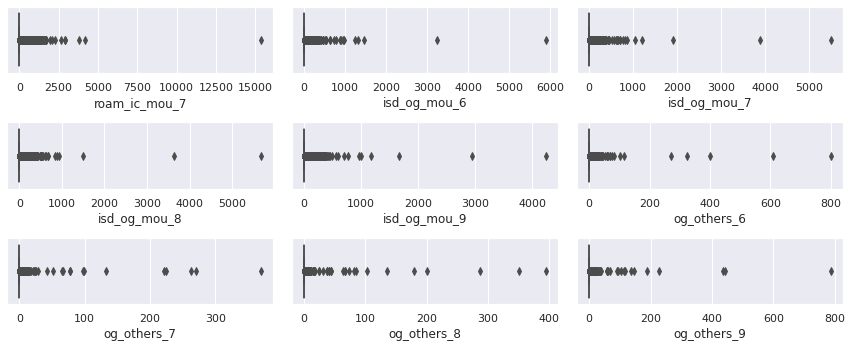

In [726]:

skewed_vars = skewed_data[skewed_data >100].index
print("Number of skewed variables: {}".format(len(skewed_vars)))
print(skewed_vars)
plt.figure(figsize=(12,5))
for i in range(0,len(skewed_vars)):
  plt.subplot(3,3,i+1)
  sns.boxplot(telecom_data[skewed_vars[i]])
  plt.tight_layout()
print(telecom_data[skewed_vars].describe())

In [727]:
#Dropping all the skewed variables
telecom_data.drop(skewed_vars,axis=1,inplace=True)
print(telecom_data.shape)

(99999, 217)


In [728]:
#dividing date categorical and numerical cols for treating missing values
telecom_data.dtypes
dateCols = telecom_data.columns[telecom_data.columns.str.contains('date')].values
catCols = telecom_data.columns[(telecom_data.columns.str.contains('night')) | (telecom_data.columns.str.contains('monthly_'))| (telecom_data.columns.str.contains('fb_'))].values
numCols = [col for col in telecom_data.columns if col not in dateCols]
numCols = [col for col in numCols if col not in catCols]
print("Cat Cols length: {}".format(len(catCols)))
print("Num Cols length: {}".format(len(numCols)))
print("date Cols length: {}".format(len(dateCols)))

Cat Cols length: 16
Num Cols length: 189
date Cols length: 12


In [729]:
# Dividing data into months for better manipulation
data_6 = telecom_data[telecom_data.columns[telecom_data.columns.str.endswith('6')]]
data_7 = telecom_data[telecom_data.columns[telecom_data.columns.str.endswith('7')]]
data_8 = telecom_data[telecom_data.columns[telecom_data.columns.str.endswith('8')]]
data_9 = telecom_data[telecom_data.columns[telecom_data.columns.str.endswith('9')]]

#checking missing values month wise
print("-------- Month 6 ----------")
print(round(100*(data_6.isnull().sum()/len(telecom_data.index)),2))
print("-------- Month 7 ----------")
print(round(100*(data_7.isnull().sum()/len(telecom_data.index)),2))
print("-------- Month 8 ----------")
print(round(100*(data_8.isnull().sum()/len(telecom_data.index)),2))
print("-------- Month 9 ----------")
print(round(100*(data_9.isnull().sum()/len(telecom_data.index)),2))

-------- Month 6 ----------
last_date_of_month_6         0.00
arpu_6                       0.00
onnet_mou_6                  3.94
offnet_mou_6                 3.94
roam_ic_mou_6                3.94
roam_og_mou_6                3.94
loc_og_t2t_mou_6             3.94
loc_og_t2m_mou_6             3.94
loc_og_t2f_mou_6             3.94
loc_og_t2c_mou_6             3.94
loc_og_mou_6                 3.94
std_og_t2t_mou_6             3.94
std_og_t2m_mou_6             3.94
std_og_t2f_mou_6             3.94
std_og_t2c_mou_6             3.94
std_og_mou_6                 3.94
spl_og_mou_6                 3.94
total_og_mou_6               0.00
loc_ic_t2t_mou_6             3.94
loc_ic_t2m_mou_6             3.94
loc_ic_t2f_mou_6             3.94
loc_ic_mou_6                 3.94
std_ic_t2t_mou_6             3.94
std_ic_t2m_mou_6             3.94
std_ic_t2f_mou_6             3.94
std_ic_t2o_mou_6             3.94
std_ic_mou_6                 3.94
total_ic_mou_6               0.00
spl_ic_mou_6        

- All months have equal amount of data missing indivisually

- Observations:
Columns with missing values > 70% are pertaining to Data recharge and usage.Hence,all have been imputed with 0 as 0 implies the service is not used.


In [730]:
#checking date columns missing values month wise
print(round(100*(telecom_data[dateCols].isnull().sum()/len(telecom_data.index)),2))

last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
date_of_last_rech_6          1.61
date_of_last_rech_7          1.77
date_of_last_rech_8          3.62
date_of_last_rech_9          4.76
date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
dtype: float64


In [731]:
#changing date columns to month values
dayDateCols = []
for i in dateCols:
  colName = i+"_day"
  dayDateCols.append(colName)
  telecom_data[colName] = pd.to_datetime(telecom_data[i])
  telecom_data[colName] = telecom_data[colName].dt.day  

telecom_data.drop(dateCols,axis=1,inplace=True)

#checking date columns missing values month wise
print(round(100*(telecom_data[dayDateCols].isnull().sum()/len(telecom_data.index)),2))

last_date_of_month_6_day         0.00
last_date_of_month_7_day         0.60
last_date_of_month_8_day         1.10
last_date_of_month_9_day         1.66
date_of_last_rech_6_day          1.61
date_of_last_rech_7_day          1.77
date_of_last_rech_8_day          3.62
date_of_last_rech_9_day          4.76
date_of_last_rech_data_6_day    74.85
date_of_last_rech_data_7_day    74.43
date_of_last_rech_data_8_day    73.66
date_of_last_rech_data_9_day    74.08
dtype: float64


In [732]:
# setting month values to 0s where >70%
day_cols_higher_missing = ['date_of_last_rech_data_6_day','date_of_last_rech_data_7_day','date_of_last_rech_data_8_day','date_of_last_rech_data_9_day']
for col in day_cols_higher_missing:
    telecom_data.loc[pd.isnull(telecom_data[col]),col] = 0

print(round(100*(telecom_data[dayDateCols].isnull().sum()/len(telecom_data.index)),2))

last_date_of_month_6_day        0.00
last_date_of_month_7_day        0.60
last_date_of_month_8_day        1.10
last_date_of_month_9_day        1.66
date_of_last_rech_6_day         1.61
date_of_last_rech_7_day         1.77
date_of_last_rech_8_day         3.62
date_of_last_rech_9_day         4.76
date_of_last_rech_data_6_day    0.00
date_of_last_rech_data_7_day    0.00
date_of_last_rech_data_8_day    0.00
date_of_last_rech_data_9_day    0.00
dtype: float64


- Remaining missing date data is less than 70% and will be imputed through kNN

In [733]:
# Dividing data into months for better manipulation
data_6 = telecom_data[telecom_data.columns[telecom_data.columns.str.endswith('6')]]
data_7 = telecom_data[telecom_data.columns[telecom_data.columns.str.endswith('7')]]
data_8 = telecom_data[telecom_data.columns[telecom_data.columns.str.endswith('8')]]
data_9 = telecom_data[telecom_data.columns[telecom_data.columns.str.endswith('9')]]

#checking missing values month wise
print("-------- Month 6 ----------")
print(round(100*(data_6.isnull().sum()/len(telecom_data.index)),2))
print("-------- Month 7 ----------")
print(round(100*(data_7.isnull().sum()/len(telecom_data.index)),2))
print("-------- Month 8 ----------")
print(round(100*(data_8.isnull().sum()/len(telecom_data.index)),2))
print("-------- Month 9 ----------")
print(round(100*(data_9.isnull().sum()/len(telecom_data.index)),2))

-------- Month 6 ----------
arpu_6                 0.00
onnet_mou_6            3.94
offnet_mou_6           3.94
roam_ic_mou_6          3.94
roam_og_mou_6          3.94
loc_og_t2t_mou_6       3.94
loc_og_t2m_mou_6       3.94
loc_og_t2f_mou_6       3.94
loc_og_t2c_mou_6       3.94
loc_og_mou_6           3.94
std_og_t2t_mou_6       3.94
std_og_t2m_mou_6       3.94
std_og_t2f_mou_6       3.94
std_og_t2c_mou_6       3.94
std_og_mou_6           3.94
spl_og_mou_6           3.94
total_og_mou_6         0.00
loc_ic_t2t_mou_6       3.94
loc_ic_t2m_mou_6       3.94
loc_ic_t2f_mou_6       3.94
loc_ic_mou_6           3.94
std_ic_t2t_mou_6       3.94
std_ic_t2m_mou_6       3.94
std_ic_t2f_mou_6       3.94
std_ic_t2o_mou_6       3.94
std_ic_mou_6           3.94
total_ic_mou_6         0.00
spl_ic_mou_6           3.94
isd_ic_mou_6           3.94
ic_others_6            3.94
total_rech_num_6       0.00
total_rech_amt_6       0.00
max_rech_amt_6         0.00
last_day_rch_amt_6     0.00
total_rech_data_6   

In [734]:
#getting cols with more than 70% missing
col_missing_perc = round(100*(telecom_data.isnull().sum()/len(telecom_data.index)),2)
col_missing_perc_greater_70 = []
for i in range(0,len(col_missing_perc)):
    if col_missing_perc[i]>70:
        col_missing_perc_greater_70.append(col_missing_perc.index[i])
col_missing_perc_greater_70

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

- Observations: The remaining Columns with missing values > 70% are pertaining to Data recharge and usage.Hence,all have been imputed with 0 as 0 implies the service is not used.

In [735]:
#telecom_data.loc[(telecom_data['count_rech_3g_6'] == 0.0) & (telecom_data['count_rech_2g_6'] == 0.0),['count_rech_3g_6','count_rech_2g_6','total_rech_data_6','av_rech_amt_data_6','night_pck_user_6','arpu_2g_6','arpu_3g_6']].head()
for col in col_missing_perc_greater_70:
    telecom_data.loc[pd.isnull(telecom_data[col]),col] =0

In [736]:
# Dividing data into months for better manipulation
data_6 = telecom_data[telecom_data.columns[telecom_data.columns.str.endswith('6')]]
data_7 = telecom_data[telecom_data.columns[telecom_data.columns.str.endswith('7')]]
data_8 = telecom_data[telecom_data.columns[telecom_data.columns.str.endswith('8')]]
data_9 = telecom_data[telecom_data.columns[telecom_data.columns.str.endswith('9')]]

#checking missing values month wise
print("-------- Month 6 ----------")
print(round(100*(data_6.isnull().sum()/len(telecom_data.index)),2))
print("-------- Month 7 ----------")
print(round(100*(data_7.isnull().sum()/len(telecom_data.index)),2))
print("-------- Month 8 ----------")
print(round(100*(data_8.isnull().sum()/len(telecom_data.index)),2))
print("-------- Month 9 ----------")
print(round(100*(data_9.isnull().sum()/len(telecom_data.index)),2))

-------- Month 6 ----------
arpu_6                0.00
onnet_mou_6           3.94
offnet_mou_6          3.94
roam_ic_mou_6         3.94
roam_og_mou_6         3.94
loc_og_t2t_mou_6      3.94
loc_og_t2m_mou_6      3.94
loc_og_t2f_mou_6      3.94
loc_og_t2c_mou_6      3.94
loc_og_mou_6          3.94
std_og_t2t_mou_6      3.94
std_og_t2m_mou_6      3.94
std_og_t2f_mou_6      3.94
std_og_t2c_mou_6      3.94
std_og_mou_6          3.94
spl_og_mou_6          3.94
total_og_mou_6        0.00
loc_ic_t2t_mou_6      3.94
loc_ic_t2m_mou_6      3.94
loc_ic_t2f_mou_6      3.94
loc_ic_mou_6          3.94
std_ic_t2t_mou_6      3.94
std_ic_t2m_mou_6      3.94
std_ic_t2f_mou_6      3.94
std_ic_t2o_mou_6      3.94
std_ic_mou_6          3.94
total_ic_mou_6        0.00
spl_ic_mou_6          3.94
isd_ic_mou_6          3.94
ic_others_6           3.94
total_rech_num_6      0.00
total_rech_amt_6      0.00
max_rech_amt_6        0.00
last_day_rch_amt_6    0.00
total_rech_data_6     0.00
max_rech_data_6       0.00


In [737]:
missing_data=round(100*(telecom_data.isnull().sum()/len(telecom_data.index)),2)
non_zero_missing=missing_data[missing_data!=0]
telecom_data[non_zero_missing.index].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,last_date_of_month_7_day,last_date_of_month_8_day,last_date_of_month_9_day,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day,date_of_last_rech_9_day
0,0.0,0.0,0.0,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,31.0,31.0,30.0,21.0,16.0,8.0,28.0
1,0.0,0.0,0.0,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,4.68,23.43,12.76,0.00,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,31.0,31.0,30.0,29.0,31.0,28.0,30.0
2,0.0,0.0,0.0,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.0,0.0,0.0,0.0,0.0,47.64,108.68,120.94,18.04,46.56,236.84,96.84,42.08,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,0.0,0.0,0.0,0.0,139.33,306.66,239.03,171.49,0.21,0.0,0.0,0.45,0.00,0.85,0.0,0.01,0.93,3.14,0.0,0.36,31.0,31.0,30.0,17.0,24.0,14.0,29.0
3,0.0,0.0,0.0,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.73,6.53,9.99,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,29.23,16.63,296.11,236.21,10.96,0.00,18.09,43.29,62.08,19.98,8.04,41.73,113.96,64

### Filtering High Value customers

In [738]:
#Filter high value customers
# Formula to use: (Total_calling recharge of month 6 and 7 + Total data recharge of month 6 and 7)/2

print("Shape before filtering: {}".format(telecom_data.shape))
telecom_data['avg_data_6_7'] = telecom_data['av_rech_amt_data_6'] + telecom_data['av_rech_amt_data_7'] ## need to check these values
telecom_data['avg_call_6_7'] = (telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7'])/2
telecom_data['avg_usage_6_7'] = telecom_data['avg_data_6_7'] + telecom_data['avg_call_6_7']
telecom_data = telecom_data[telecom_data['avg_usage_6_7'] > telecom_data['avg_usage_6_7'].quantile(0.70)]
telecom_data.drop(['avg_data_6_7','avg_call_6_7','avg_usage_6_7'],axis=1,inplace=True)
print("Shape After filtering: {}".format(telecom_data.shape))

Shape before filtering: (99999, 217)
Shape After filtering: (29969, 217)


In [739]:
telecom_data.dtypes

mobile_number                     int64
circle_id                         int64
loc_og_t2o_mou                  float64
std_og_t2o_mou                  float64
loc_ic_t2o_mou                  float64
arpu_6                          float64
arpu_7                          float64
arpu_8                          float64
arpu_9                          float64
onnet_mou_6                     float64
onnet_mou_7                     float64
onnet_mou_8                     float64
onnet_mou_9                     float64
offnet_mou_6                    float64
offnet_mou_7                    float64
offnet_mou_8                    float64
offnet_mou_9                    float64
roam_ic_mou_6                   float64
roam_ic_mou_8                   float64
roam_ic_mou_9                   float64
roam_og_mou_6                   float64
roam_og_mou_7                   float64
roam_og_mou_8                   float64
roam_og_mou_9                   float64
loc_og_t2t_mou_6                float64


**Imputing missing values using KNNImputer**

In [740]:
from sklearn.impute import KNNImputer
data_cols = telecom_data.drop(['circle_id','mobile_number'],axis=1).columns
imputer=KNNImputer(n_neighbors=5) ## chose 5 as data is huge and also as 5 is an industry standard.
data_clean=pd.DataFrame(imputer.fit_transform(telecom_data.drop(['circle_id','mobile_number'],axis=1)))
data_clean.columns=data_cols
print(data_clean.shape)
data_clean.head()

(29969, 215)


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,last_date_of_month_6_day,last_date_of_month_7_day,last_date_of_month_8_day,last_date_of_month_9_day,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day,date_of_last_rech_9_day,date_of_last_rech_data_6_day,date_of_last_rech_data_7_day,date_of_last_rech_data_8_day,date_of_last_rech_data_9_day
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.248,3.93,0.00,2.634,15.692,39.918,0.00,21.626,17.852,0.00,7.054,15.176,4.286,0.00,17.948,0.142,3.854,0.00,1.262,0.624,18.066,0.00,4.190,0.00,3.202,0.00,0.00,0.0,0.00,0.00,0.452,0.768,25.124,0.00,5.454,0.00,0.076,0.00,0.000,0.00,8.96,0.00,0.00,0.00,5.376,0.00,0.00,0.0,0.0,0.0,0.0,0.00,14.412,0.00,0.000,0.0,0.022,0.00,0.456,0.00,0.00,0.00,0.00,36.27,16.598,0.16,13.902,8.444,27.976,4.13,32.038,0.328,0.542,1.15,0.79,45.044,45.122,5.44,46.734,0.00,0.12,0.00,0.036,10.846,10.30,0.00,3.788,0.00,0.00,0.00,0.066,0.0,0.0,0.0,0.0,10.846,10.42,0.00,3.890,0.00,0.00,5.44,0.00,0.04,0.0,0.0,0.048,1.856,2.06,0.00,0.00,0.00,0.03,0.00,0.0,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,25

In [741]:
data_clean.dtypes

loc_og_t2o_mou                  float64
std_og_t2o_mou                  float64
loc_ic_t2o_mou                  float64
arpu_6                          float64
arpu_7                          float64
arpu_8                          float64
arpu_9                          float64
onnet_mou_6                     float64
onnet_mou_7                     float64
onnet_mou_8                     float64
onnet_mou_9                     float64
offnet_mou_6                    float64
offnet_mou_7                    float64
offnet_mou_8                    float64
offnet_mou_9                    float64
roam_ic_mou_6                   float64
roam_ic_mou_8                   float64
roam_ic_mou_9                   float64
roam_og_mou_6                   float64
roam_og_mou_7                   float64
roam_og_mou_8                   float64
roam_og_mou_9                   float64
loc_og_t2t_mou_6                float64
loc_og_t2t_mou_7                float64
loc_og_t2t_mou_8                float64


In [742]:
print(round(100*(data_clean.isnull().sum()/len(data_clean.index)),2))

loc_og_t2o_mou                  0.0
std_og_t2o_mou                  0.0
loc_ic_t2o_mou                  0.0
arpu_6                          0.0
arpu_7                          0.0
arpu_8                          0.0
arpu_9                          0.0
onnet_mou_6                     0.0
onnet_mou_7                     0.0
onnet_mou_8                     0.0
onnet_mou_9                     0.0
offnet_mou_6                    0.0
offnet_mou_7                    0.0
offnet_mou_8                    0.0
offnet_mou_9                    0.0
roam_ic_mou_6                   0.0
roam_ic_mou_8                   0.0
roam_ic_mou_9                   0.0
roam_og_mou_6                   0.0
roam_og_mou_7                   0.0
roam_og_mou_8                   0.0
roam_og_mou_9                   0.0
loc_og_t2t_mou_6                0.0
loc_og_t2t_mou_7                0.0
loc_og_t2t_mou_8                0.0
loc_og_t2t_mou_9                0.0
loc_og_t2m_mou_6                0.0
loc_og_t2m_mou_7            

### Deriving Churn(Target) Variable

In [743]:
#Defining Churn - Target Variable
cols_for_churn_det = ['total_og_mou_9','total_ic_mou_9','vol_2g_mb_9','vol_3g_mb_9'] 
 
#checking missing values for these cols
data_clean[cols_for_churn_det].isnull().sum()
## no missing values for these - proceeding wtith determining target variable
data_clean['total_usage_9'] = data_clean['total_og_mou_9'] +data_clean['total_ic_mou_9']+data_clean['vol_2g_mb_9']+data_clean['vol_3g_mb_9']
data_clean['churn'] = data_clean['total_usage_9'].apply(lambda x: 0 if x>0 else 1)
data_clean[['total_usage_9','churn']].head()
data_clean.drop(['total_usage_9'],axis=1,inplace=True)
data_clean['churn'].value_counts(normalize=True)

0    0.920084
1    0.079916
Name: churn, dtype: float64

In [744]:
# Dropping cols that belong to churn month 9
month_9_cols = data_clean.columns[data_clean.columns.str.endswith('9')]
data_clean.drop(month_9_cols,axis=1,inplace=True)
data_clean.drop(['sep_vbc_3g','date_of_last_rech_9_day','date_of_last_rech_data_9_day','last_date_of_month_9_day'],axis=1,inplace=True)
data_clean.shape

(29969, 163)

In [745]:
telecom_data = data_clean

In [746]:

telecom_data.dtypes
dateCols = telecom_data.columns[telecom_data.columns.str.contains('date')].values
catCols = telecom_data.columns[(telecom_data.columns.str.contains('night')) | (telecom_data.columns.str.contains('monthly_'))| (telecom_data.columns.str.contains('fb_'))].values
numCols = [col for col in telecom_data.columns if col not in dateCols]
numCols = [col for col in numCols if col not in catCols]
print("Cat Cols length: {}".format(len(catCols)))
print("Num Cols length: {}".format(len(numCols)))
print("date Cols length: {}".format(len(dateCols)))

Cat Cols length: 12
Num Cols length: 142
date Cols length: 9


## Exploratory Data Analysis

### EDA - Categorical **Variables**

In [747]:
catCols=[col for col in catCols if not col.endswith('9')]
numCols=[col for col in numCols if not col.endswith('9')]
dateCols=[col for col in dateCols if not col.endswith('9')]
print("Cat Cols length: {}".format(len(catCols)))
print("Num Cols length: {}".format(len(numCols)))
print("date Cols length: {}".format(len(dateCols)))

Cat Cols length: 12
Num Cols length: 142
date Cols length: 9


In [748]:
for i in catCols:
  print(pd.crosstab(telecom_data.churn,telecom_data[i],normalize=True))
  print("***************")

night_pck_user_6       0.0       1.0
churn                               
0                 0.909406  0.010678
1                 0.078781  0.001135
***************
night_pck_user_7       0.0       1.0
churn                               
0                 0.909907  0.010177
1                 0.079249  0.000667
***************
night_pck_user_8       0.0       1.0
churn                               
0                 0.910307  0.009777
1                 0.079616  0.000300
***************
monthly_2g_6       0.0       1.0       2.0       3.0       4.0
churn                                                         
0             0.738396  0.163002  0.017618  0.000901  0.000167
1             0.071808  0.007141  0.000868  0.000033  0.000067
***************
monthly_2g_7       0.0       1.0       2.0       3.0       4.0       5.0
churn                                                                   
0             0.729654  0.167940  0.021155  0.001101  0.000167  0.000067
1             0.07330

- Inferences:
  - Out of all the customers, customers who do not opt for night pack are highly like to be churned. For the month of June there were 6% customers who did not have night pack and churned.
 
 - Out of all the customers, cutomers who do not opt for monthly 2G/3G plans are highly likely to be churned. For the month of june july and August, ~ 8% of customers are those who do nor have monthly 2G/3G plans and churned.

 - For the month of June and July, ~5% users used Facebook/Social networking sites services and churned.

In [749]:
#Function to check total counts, skewness and importance of a categorical column based on conversion rate. 
def check_count_conversion_rate(data,X,target):
    #checking counts of col
    col_counts = pd.DataFrame(data[X].value_counts()).reset_index()
    col_counts.columns = [X,'Counts']
    col_counts['Total%'] = col_counts['Counts']/len(data.index)
    #checking conversion rate by col
    groupby_col = pd.DataFrame(data.groupby(X)[target].mean()).reset_index()

    col_counts_percentage = col_counts.merge(groupby_col,how='inner',on=X)
    return col_counts_percentage

In [750]:
check_count_conversion_rate(telecom_data,'night_pck_user_6','churn')

,night_pck_user_6,Counts,Total%,churn
0,0.0,29615,0.988188,0.079723
1,1.0,354,0.011812,0.096045


In [751]:
check_count_conversion_rate(telecom_data,'fb_user_6','churn')

,fb_user_6,Counts,Total%,churn
0,1.0,15860,0.529214,0.063682
1,0.0,14109,0.470786,0.098164


In [752]:
check_count_conversion_rate(telecom_data,'monthly_3g_6','churn')

,monthly_3g_6,Counts,Total%,churn
0,0.0,24920,0.831526,0.080498
1,1.0,3820,0.127465,0.076963
2,2.0,853,0.028463,0.082063
3,3.0,237,0.007908,0.067511
4,4.0,76,0.002536,0.052632
5,5.0,34,0.001135,0.117647
6,6.0,12,0.000400,0.083333
7,7.0,9,0.000300,0.000000
8,8.0,3,0.000100,0.000000
9,11.0,2,0.000067,0.000000


- 88% customers do not have monthly 3G plan in month 6. Out of those, 8% churned.

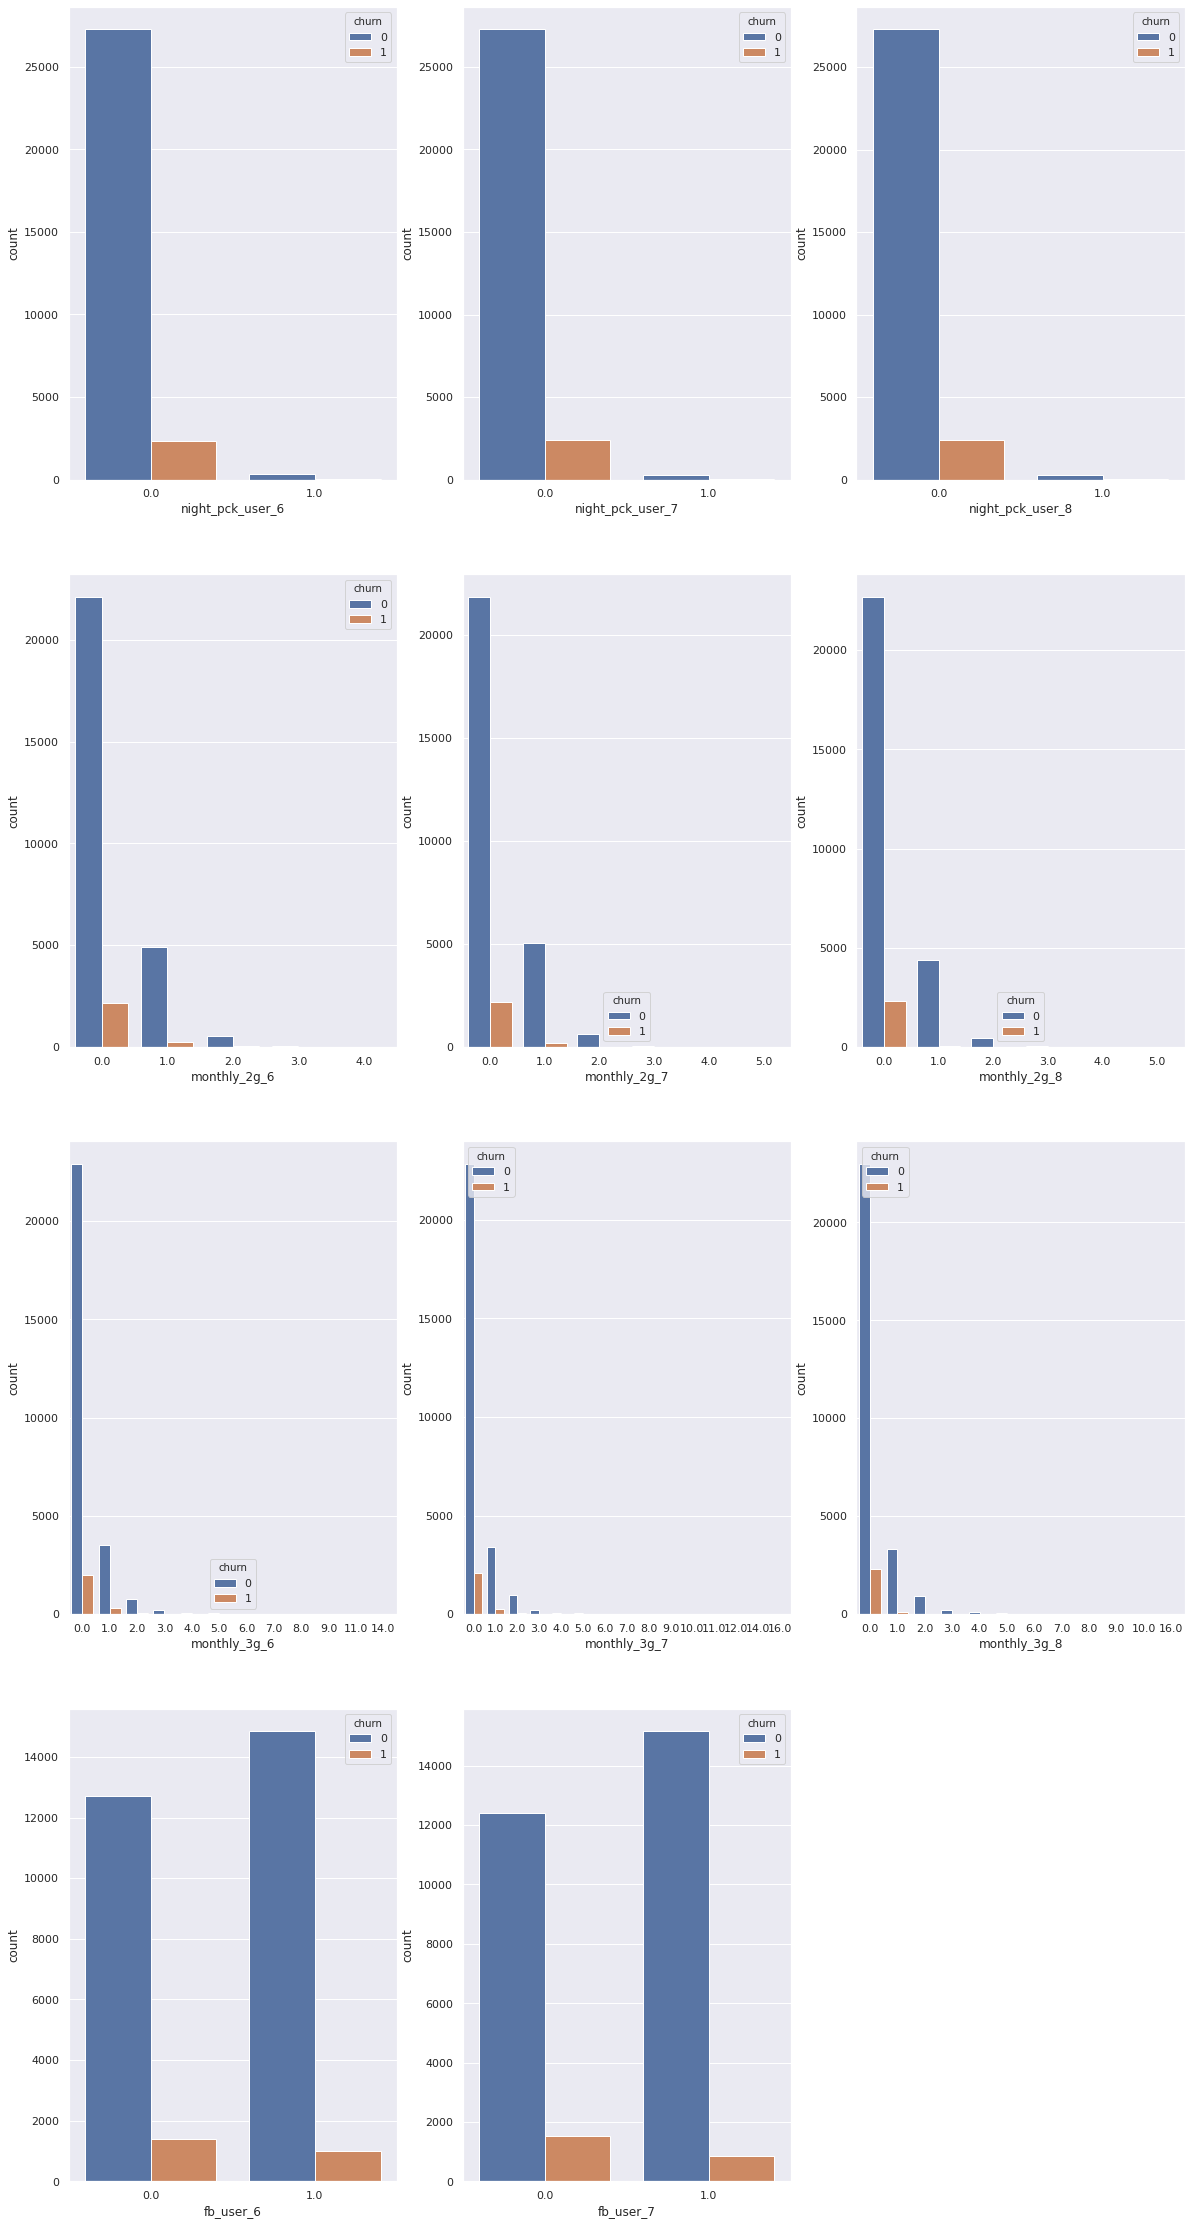

In [753]:
#EDA for Cat cols
def countplot_catVariables(cols):
    plt.figure(figsize=(20, 40))
    for i in range(0,len(cols)):
        plt.subplot(4,3,i+1)
        sns.countplot(x = cols[i], data = telecom_data,hue= 'churn')
    plt.show()
    
countplot_catVariables(catCols[:-1])

### EDA - Numerical Data

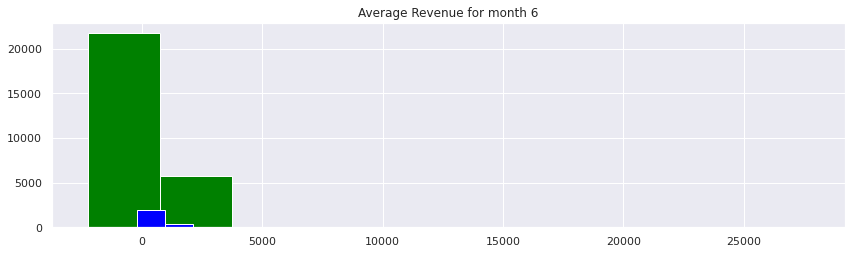

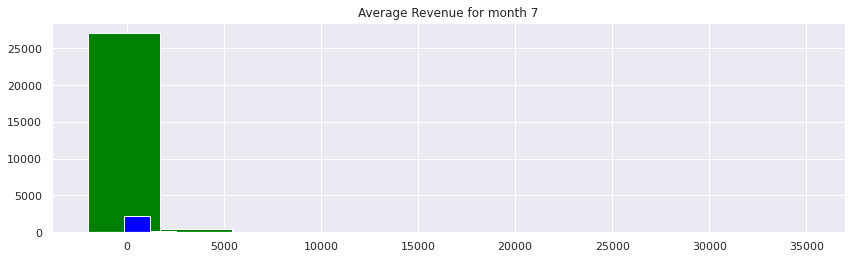

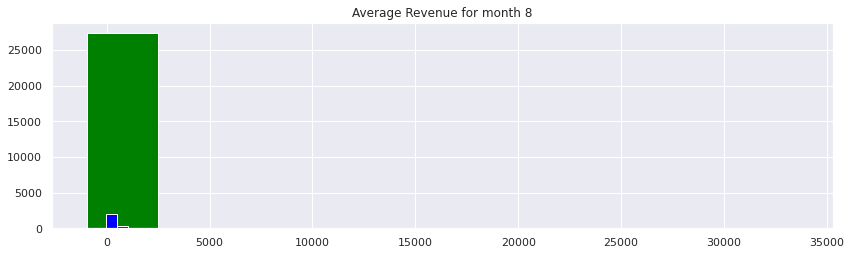

             arpu_6        arpu_7       arpu_8
count   2395.000000   2395.000000  2395.000000
mean     672.529681    551.329701   242.815815
std      586.666990    539.312524   387.989494
min     -209.465000   -158.963000   -37.887000
25%      353.173500    240.654500     0.000000
50%      562.470000    465.783000    89.133000
75%      839.087000    713.541500   344.533500
max    11505.508000  13224.119000  5228.826000


In [754]:
#Checking Average Revenue per user
revenues = ['arpu_6','arpu_7','arpu_8']

for i in range(0,len(revenues)):
  plt.figure(figsize=(12,10))
  plt.subplot(3,1,i+1)
  telecom_data.loc[telecom_data['churn']==0][revenues[i]].hist(color='green')
  telecom_data.loc[telecom_data['churn']==1][revenues[i]].hist(color='blue')
  plt.title('Average Revenue for month {}'.format(i+6))
  plt.tight_layout()
  plt.show()

print(telecom_data[telecom_data.churn==1][revenues].describe())

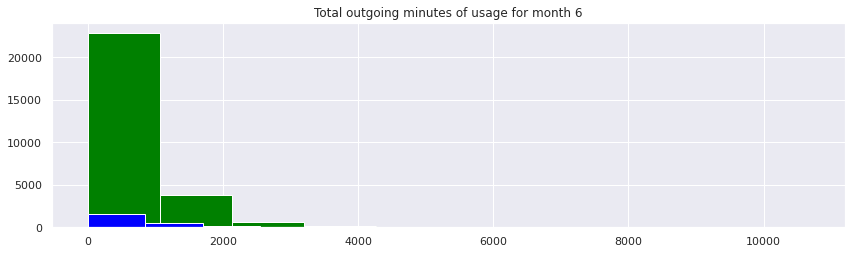

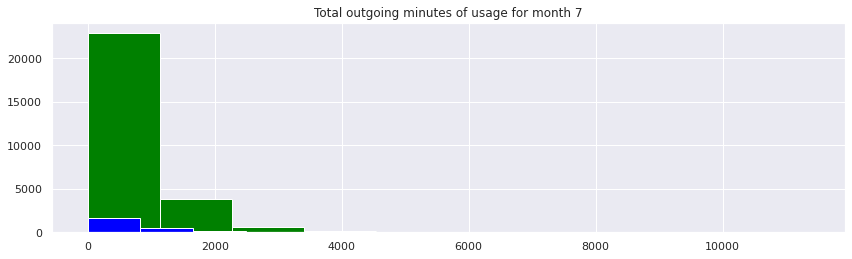

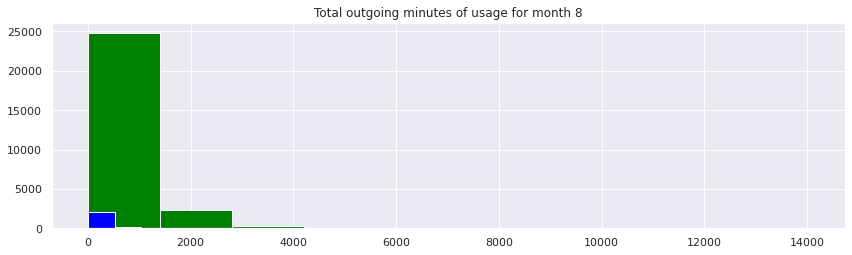

       total_og_mou_6  total_og_mou_7  total_og_mou_8
count     2395.000000     2395.000000     2395.000000
mean       799.480405      637.738434      212.118175
std        906.158830      830.061407      480.550527
min          0.000000        0.000000        0.000000
25%         91.560000       25.095000        0.000000
50%        535.540000      349.860000        0.000000
75%       1193.360000      926.075000      196.470000
max       8488.360000     8285.640000     5206.210000


In [755]:
#Checking total outgoing minutes of usage for user
outgoing = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']

for i in range(0,len(outgoing)):
  plt.figure(figsize=(12,10))
  plt.subplot(3,1,i+1)
  telecom_data.loc[telecom_data['churn']==0][outgoing[i]].hist(color='green')
  telecom_data.loc[telecom_data['churn']==1][outgoing[i]].hist(color='blue')
  plt.title('Total outgoing minutes of usage for month {}'.format(i+6))
  plt.tight_layout()
  plt.show()

print(telecom_data[telecom_data.churn==1][outgoing].describe())

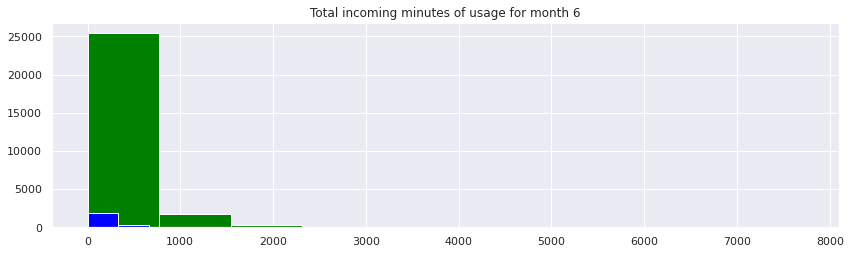

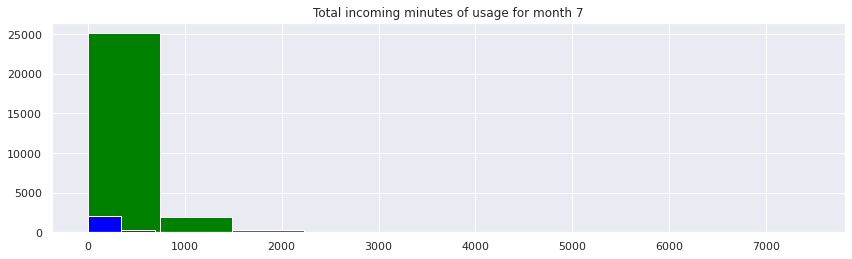

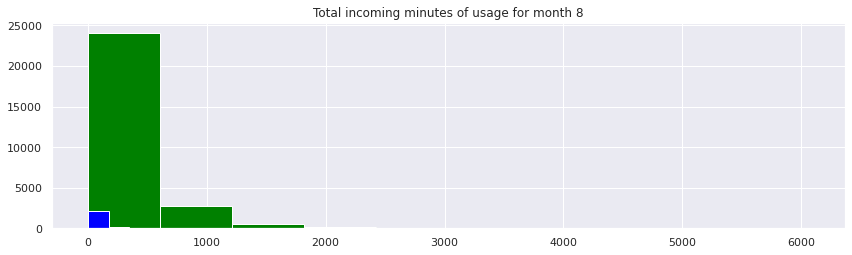

       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count     2395.000000     2395.000000     2395.000000
mean       230.354601      186.846405       64.789290
std        328.196276      300.971761      147.925239
min          0.000000        0.000000        0.000000
25%         35.775000       15.950000        0.000000
50%        129.190000       94.460000        0.000000
75%        286.210000      233.960000       61.760000
max       3325.960000     3470.380000     1750.360000


In [756]:
#Checking total incoming minutes of usage for user
incoming = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']

for i in range(0,len(incoming)):
  plt.figure(figsize=(12,10))
  plt.subplot(3,1,i+1)
  telecom_data.loc[telecom_data['churn']==0][incoming[i]].hist(color='green')
  telecom_data.loc[telecom_data['churn']==1][incoming[i]].hist(color='blue')
  plt.title('Total incoming minutes of usage for month {}'.format(i+6))
  plt.tight_layout()
  plt.show()

print(telecom_data[telecom_data.churn==1][incoming].describe())

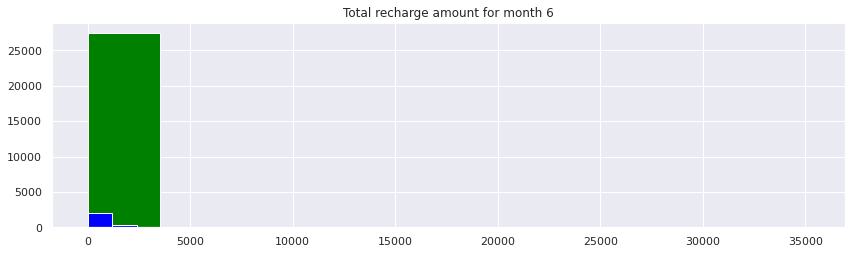

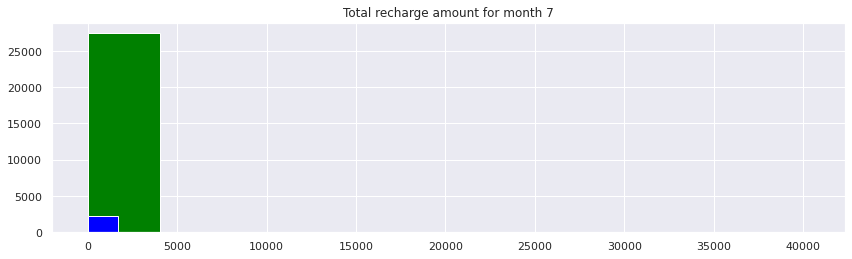

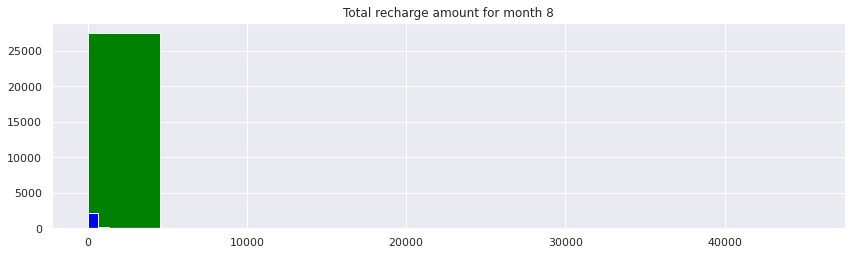

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8
count      29969.000000      29969.000000      29969.000000
mean         662.168574        662.235744        587.286896
std          559.517765        580.941342        610.212384
min            0.000000          0.000000          0.000000
25%          358.000000        350.000000        252.000000
50%          565.000000        560.000000        491.000000
75%          833.000000        831.000000        777.000000
max        35190.000000      40335.000000      45320.000000


In [757]:
#Checking total recharge amount for user
recharge = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']

for i in range(0,len(recharge)):
  plt.figure(figsize=(12,10))
  plt.subplot(3,1,i+1)
  telecom_data.loc[telecom_data['churn']==0][recharge[i]].hist(color='green')
  telecom_data.loc[telecom_data['churn']==1][recharge[i]].hist(color='blue')
  plt.title('Total recharge amount for month {}'.format(i+6))
  plt.tight_layout()
  plt.show()

print(telecom_data[recharge].describe())

- Inferences:
  - On an average the revenue, minutes of usage and recharges are less for the customers who finally churned.
  - In the action phase, that is the month August, we notice that the revenue is decreased for all those customers who churned.
  - Similarly for the month of August, the total outgoing amd incoming minutes have been reduced.
  - Customers who did not churn follow the same pattern of usage for all the three months.


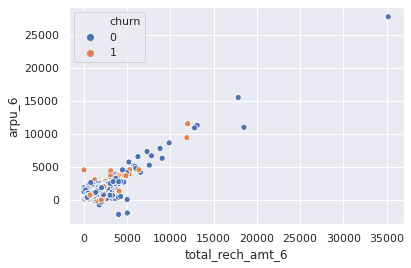

In [758]:
#scatter plot
sns.scatterplot(x="total_rech_amt_6", y="arpu_6",
              hue="churn",
              data=telecom_data);


## Creating Derived Variables

In [759]:
telecom_data.isnull().sum()

loc_og_t2o_mou                  0
std_og_t2o_mou                  0
loc_ic_t2o_mou                  0
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                     0
onnet_mou_7                     0
onnet_mou_8                     0
offnet_mou_6                    0
offnet_mou_7                    0
offnet_mou_8                    0
roam_ic_mou_6                   0
roam_ic_mou_8                   0
roam_og_mou_6                   0
roam_og_mou_7                   0
roam_og_mou_8                   0
loc_og_t2t_mou_6                0
loc_og_t2t_mou_7                0
loc_og_t2t_mou_8                0
loc_og_t2m_mou_6                0
loc_og_t2m_mou_7                0
loc_og_t2m_mou_8                0
loc_og_t2f_mou_6                0
loc_og_t2f_mou_7                0
loc_og_t2f_mou_8                0
loc_og_t2c_mou_6                0
loc_og_t2c_mou_7                0
loc_og_t2c_mou_8                0
loc_og_mou_6  

In [760]:
(telecom_data['aon']/365).describe()

count    29969.000000
mean         3.379596
std          2.657345
min          0.493151
25%          1.271233
50%          2.378082
75%          5.019178
max         11.838356
Name: aon, dtype: float64

In [761]:

# consider age on network 
# consider difference in revenue (arpu) from month 8 (action) and avg of month6 + month7 (good phase)
#month_6.columns
telecom_data['total_rech_amt_diff'] = telecom_data['total_rech_amt_8'] - (telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7'])/2
telecom_data['vol_3g_mb_diff'] = telecom_data['vol_3g_mb_8'] - (telecom_data['vol_3g_mb_6'] + telecom_data['vol_3g_mb_7'])/2
telecom_data['vol_2g_mb_diff'] = telecom_data['vol_2g_mb_8'] - (telecom_data['vol_2g_mb_6'] + telecom_data['vol_2g_mb_7'])/2
telecom_data['total_og_mou_diff'] = telecom_data['total_og_mou_8'] - (telecom_data['total_og_mou_6'] + telecom_data['total_og_mou_7'])/2
telecom_data['custRelation'] = pd.cut((telecom_data['aon']/365),bins = [0,2,4,6,15],labels=[0,1,2,3])
telecom_data.drop(['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'],axis=1,inplace=True)
telecom_data.drop(['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],axis=1,inplace=True)
telecom_data.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'],axis=1,inplace=True)
telecom_data.drop(['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8'],axis=1,inplace=True)
telecom_data.drop(['aon'],axis=1,inplace=True)


In [762]:
telecom_data['custRelation'].value_counts(dropna=False)

0    13018
1     7509
3     6300
2     3142
Name: custRelation, dtype: int64

## Outlier Analysis

Since the number of numerical columns are many,outlier analysis has been carried out by comparing the spread of values at various percentiles.

In [763]:
## Outlier Analysis
telecom_data.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])                  

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,last_date_of_month_6_day,last_date_of_month_7_day,last_date_of_month_8_day,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day,date_of_last_rech_data_6_day,date_of_last_rech_data_7_day,date_of_last_rech_data_8_day,churn,total_rech_amt_diff,vol_3g_mb_diff,vol_2g_mb_diff,total_og_mou_diff
count,29969.0,29969.0,29969.0,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.0,29969.0,29969.0,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.00000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.0,29969.0,29969.0,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.000000,29969.00000,29969.000000,29969.000000,29969.000000,

**Observations:**<br>

Outliers exist in various features but they have not been treated as outliers beyond the upper boundary in this usecase pertain to high value customers and thus manipulation of values may result in incorrect deductions.

 

### Identifying Highly correlated Features

In [764]:
telecom_data.corr().unstack().reset_index()
tel_corrdf = telecom_data.corr().where(np.triu(np.ones(telecom_data.corr().shape),k=1).astype(np.bool))
tel_corrdf=tel_corrdf.unstack().reset_index()
tel_corrdf.columns=['var1','var2','correlation']
tel_corrdf.head()


,var1,var2,correlation
0,loc_og_t2o_mou,loc_og_t2o_mou,NaN
1,loc_og_t2o_mou,std_og_t2o_mou,NaN
2,loc_og_t2o_mou,loc_ic_t2o_mou,NaN
3,loc_og_t2o_mou,arpu_6,NaN
4,loc_og_t2o_mou,arpu_7,NaN


In [765]:
tel_corrdf.dropna(subset=['correlation'],inplace=True)

In [766]:
## Finding top 30 positive correlations
tel_corrdf.sort_values(by='correlation',ascending=False).head(30)

,var1,var2,correlation
19664,sachet_2g_8,count_rech_2g_8,0.982630
19509,sachet_2g_7,count_rech_2g_7,0.982627
19354,sachet_2g_6,count_rech_2g_6,0.980470
17977,arpu_2g_6,arpu_3g_6,0.938971
18287,arpu_2g_8,arpu_3g_8,0.937930
18132,arpu_2g_7,arpu_3g_7,0.936350
16114,count_rech_2g_6,total_rech_data_6,0.904579
16269,count_rech_2g_7,total_rech_data_7,0.903707
16424,count_rech_2g_8,total_rech_data_8,0.899762
19503,sachet_2g_7,total_rech_data_7,0.897596


In [767]:
tel_corrdf.sort_values(by='correlation',ascending=True).head(30)

,var1,var2,correlation
23609,total_og_mou_diff,total_og_mou_6,-0.409527
20684,fb_user_6,total_og_mou_7,-0.398502
20837,fb_user_7,total_og_mou_6,-0.388524
20838,fb_user_7,total_og_mou_7,-0.379984
20683,fb_user_6,total_og_mou_6,-0.372346
23603,total_og_mou_diff,std_og_mou_6,-0.369606
20678,fb_user_6,std_og_mou_7,-0.361918
20831,fb_user_7,std_og_mou_6,-0.354540
20832,fb_user_7,std_og_mou_7,-0.346781
20677,fb_user_6,std_og_mou_6,-0.345514


In [768]:
###  Dropping highly correlated columns
corr_cols=['sachet_2g_7','sachet_2g_8','sachet_2g_6','arpu_2g_7','arpu_2g_6','arpu_2g_8','loc_ic_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','arpu_2g_6','loc_ic_mou_7','std_og_t2m_mou_7','loc_ic_t2m_mou_6','std_og_t2m_mou_6','loc_ic_mou_6','count_rech_2g_8','arpu_2g_8','count_rech_3g_7','arpu_2g_7','loc_ic_t2m_mou_8','loc_og_t2f_mou_6','count_rech_3g_8','std_og_t2t_mou_8','arpu_3g_6','sachet_2g_8']
telecom_data=telecom_data.drop(corr_cols,axis=1)
telecom_data.shape
#telecom_data.dtypes

(29969, 134)

In [769]:
print(telecom_data.shape)

(29969, 134)


In [770]:
print(round(100*(telecom_data.isnull().sum()/len(telecom_data.index)),2))

loc_og_t2o_mou                  0.0
std_og_t2o_mou                  0.0
loc_ic_t2o_mou                  0.0
arpu_6                          0.0
arpu_7                          0.0
arpu_8                          0.0
onnet_mou_6                     0.0
onnet_mou_7                     0.0
onnet_mou_8                     0.0
offnet_mou_6                    0.0
offnet_mou_7                    0.0
offnet_mou_8                    0.0
roam_ic_mou_6                   0.0
roam_ic_mou_8                   0.0
roam_og_mou_6                   0.0
roam_og_mou_7                   0.0
roam_og_mou_8                   0.0
loc_og_t2t_mou_6                0.0
loc_og_t2t_mou_7                0.0
loc_og_t2t_mou_8                0.0
loc_og_t2m_mou_6                0.0
loc_og_t2m_mou_7                0.0
loc_og_t2m_mou_8                0.0
loc_og_t2f_mou_7                0.0
loc_og_t2f_mou_8                0.0
loc_og_t2c_mou_6                0.0
loc_og_t2c_mou_7                0.0
loc_og_t2c_mou_8            

## Data Preparation

In [771]:
#changing the datatype of catCols
telecom_data[catCols].dtypes

night_pck_user_6    float64
night_pck_user_7    float64
night_pck_user_8    float64
monthly_2g_6        float64
monthly_2g_7        float64
monthly_2g_8        float64
monthly_3g_6        float64
monthly_3g_7        float64
monthly_3g_8        float64
fb_user_6           float64
fb_user_7           float64
fb_user_8           float64
dtype: object

In [772]:
catCols.remove('monthly_2g_6')
catCols.remove('monthly_2g_7')
catCols.remove('monthly_2g_8')
catCols.remove('monthly_3g_6')
catCols.remove('monthly_3g_7')
catCols.remove('monthly_3g_8')

In [773]:
catCols.append('custRelation')
for i in catCols:
  telecom_data[i] = telecom_data[i].astype(str)

In [774]:
telecom_data[catCols].dtypes

night_pck_user_6    object
night_pck_user_7    object
night_pck_user_8    object
fb_user_6           object
fb_user_7           object
fb_user_8           object
custRelation        object
dtype: object

### Creating Dummy Variables

In [775]:
catCols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'custRelation']

In [776]:
telecom_data.custRelation.value_counts()

0    13018
1     7509
3     6300
2     3142
Name: custRelation, dtype: int64

In [777]:
for col in catCols:
  dummies=pd.get_dummies(telecom_data[col],prefix=col,drop_first=True)
  telecom_data=pd.concat([telecom_data,dummies],axis=1)
telecom_data.drop(catCols,axis=1,inplace=True)

In [778]:
!pip install imbalanced-learn

### Handling Data Imbalance

In [779]:
# check version number
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
print(imblearn.__version__)

0.7.0


In [780]:
telecom_data.shape

(29969, 136)

### Splitting and Scaling Data

**Train Test split**

In [781]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

X = telecom_data.drop(['churn'],axis=1)
y = telecom_data.churn
telecom_columns = X.columns


over = SMOTE(sampling_strategy=0.1,random_state=100)
#over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.3,random_state=100)

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,stratify=y,random_state=100)
train_cols=X_train.columns
X_train_smote, y_train = over.fit_resample(X_train, y_train)
X_train_under, y_train = under.fit_resample(X_train_smote, y_train)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_under[train_cols])
X_test[train_cols]=scaler.transform(X_test[train_cols])


In [782]:
y_df = pd.DataFrame(y_train)
y_df.churn.value_counts(normalize=True)


0    0.769222
1    0.230778
Name: churn, dtype: float64

In [783]:
x_df = pd.DataFrame(X_train)
x_df.columns = telecom_columns
df = pd.concat([x_df,y_df])
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,last_date_of_month_6_day,last_date_of_month_7_day,last_date_of_month_8_day,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day,date_of_last_rech_data_6_day,date_of_last_rech_data_7_day,date_of_last_rech_data_8_day,total_rech_amt_diff,vol_3g_mb_diff,vol_2g_mb_diff,total_og_mou_diff,night_pck_user_6_1.0,night_pck_user_7_1.0,night_pck_user_8_1.0,fb_user_6_1.0,fb_user_7_1.0,fb_user_8_1.0,custRelation_1,custRelation_2,custRelation_3,churn
0,0.0,0.0,0.0,-0.138292,-0.459390,-0.012937,-0.372279,-0.382196,-0.343677,-0.237784,-0.276820,-0.064996,0.395458,0.112027,2.093304,1.148284,0.213037,-0.203908,-0.224900,-0.162861,-0.533173,-0.322528,0.063874,-0.265952,-0.304785,-0.253258,0.258736,-0.256070,-0.161617,-0.153131,-0.135255,-0.133971,0.0,0.0,0.0,-0.558917,-0.470781,-0.305833,-0.258002,-0.237338,-0.027723,-0.760595,-0.610949,-0.292163,-0.215779,-0.265827,-0.190278,-0.400080,-0.288045,-0.288958,-0.275931,-0.194755,-0.205619,0.153950,-0.308327,-0.165740,-0.180146,-0.118344,-0.134949,-0.087308,0.0,0.0,0.0,-0.349228,-0.248765,-0.094981,-0.643425,-0.517949,-0.245881,-0.399353,-0.161707,-0.199825,-0.123879,-0.151275,-0.166495,-0.082275,-0.121571,-0.065756,0.327014,-0.459231,-0.202880,-0.489805,-0.605926,-0.125320,-0.371249,-0.315257,-0.146887,-0.555753,-0.550480,-0.494763,-0.714937,-0.703070,-0.638505,-0.452733,-0.460342,-0.358456,-0.670086,-0.66162,-0.597622,-0.373345,-0.370056,-0.43619,-0.442068,-0.382466,-0.374181,-0.36192,-0.345164,-0.201199,-0.187619,-0.165653,-0.3978,-0.174463,-0.379867,0.0,0.0,0.0,0.758297,-0.144095,-0.129005,-0.915311,-0.918797,-0.812691,0.353072,0.051746,0.123428,0.557690,-0.112761,-0.103714,-0.097029,-0.997254,-0.996777,-0.857778,-0.576476,-0.324336,-0.484328,NaN
1,0.0,0.0,0.0,0.265158,-0.114843,1.034783,-0.446659,-0.449978,-0.461416,-0.175381,-0.256704,0.282895,-0.213716,-0.171624,-0.239847,-0.232269,-0.199345,-0.091135,-0.134282,-0.273569,-0.123657,-0.240108,-0.045861,-0.265952,-0.304785,-0.253258,-0.201976,-0.256070,-0.338397,-0.153131,-0.135255,-0.133971,0.0,0.0,0.0,-0.584608,-0.553495,-0.463023,-0.239113,-0.283879,-0.327671,-0.377193,-0.440501,-0.051339,2.443177,1.017904,2.911288,0.717945,-0.304657,-0.288958,-0.297640,-0.211659,-0.216093,-0.232192,-0.261541,-0.257845,-0.031788,-0.118344,-0.134949,-0.108836,0.0,0.0,0.0,-0.326224,-0.3255

In [784]:
print(X_train.shape)

(8363, 135)


In [785]:
print(X_test.shape)

(8991, 135)


## Dimensionality reduction using PCA


In [786]:
from sklearn.decomposition import PCA,IncrementalPCA

In [787]:
pca_inst=PCA(random_state=100)
pca_inst.fit(X_train)

PCA(random_state=100)

In [788]:
pca_inst.components_

array([[ 3.10917376e-19, -1.11022302e-16,  0.00000000e+00, ...,
         7.77102239e-03, -1.93130114e-03, -1.82894420e-02],
       [-7.42382206e-19, -4.44089210e-16, -1.11022302e-16, ...,
        -3.84109726e-03,  1.24738670e-02,  4.57100590e-02],
       [-4.58407049e-19, -2.77555756e-17, -9.71445147e-17, ...,
         2.97940996e-02, -1.99866284e-02, -9.02284499e-02],
       ...,
       [ 0.00000000e+00,  1.74883382e-02,  1.12290522e-02, ...,
        -1.73472348e-18,  5.20417043e-18, -6.93889390e-18],
       [ 9.99999048e-01, -1.31353757e-03,  3.46568558e-04, ...,
         2.24971951e-18,  1.91090633e-18,  2.43945489e-18],
       [ 0.00000000e+00,  4.98472408e-02,  2.99582920e-01, ...,
         1.11022302e-16,  2.77555756e-17,  0.00000000e+00]])

In [789]:
pca_inst.explained_variance_ratio_

array([1.09633792e-01, 7.45228660e-02, 5.46279069e-02, 4.55500146e-02,
       4.05539166e-02, 3.27954100e-02, 2.95170012e-02, 2.65702274e-02,
       2.57958373e-02, 2.29513595e-02, 2.25910535e-02, 2.20629130e-02,
       2.07971568e-02, 1.92233380e-02, 1.76852507e-02, 1.70602224e-02,
       1.61153373e-02, 1.55255659e-02, 1.51457525e-02, 1.45185787e-02,
       1.29225738e-02, 1.25730780e-02, 1.19385957e-02, 1.08444882e-02,
       1.04736967e-02, 1.02684814e-02, 9.91874723e-03, 9.77357461e-03,
       9.45459828e-03, 9.27425371e-03, 8.78906103e-03, 8.55785793e-03,
       8.35815180e-03, 7.88098794e-03, 7.76212449e-03, 7.41237143e-03,
       7.16959206e-03, 6.94240934e-03, 6.68353295e-03, 6.53821806e-03,
       6.08628801e-03, 5.97875117e-03, 5.74661538e-03, 5.71206072e-03,
       5.46184601e-03, 5.27889042e-03, 5.15267224e-03, 4.86258099e-03,
       4.67515186e-03, 4.53139282e-03, 4.47620975e-03, 4.37222228e-03,
       4.28944028e-03, 4.11135351e-03, 4.09257282e-03, 3.96426315e-03,
      

In [790]:
cum_variance=np.cumsum(pca_inst.explained_variance_ratio_)

### Plotting the Scree Plot

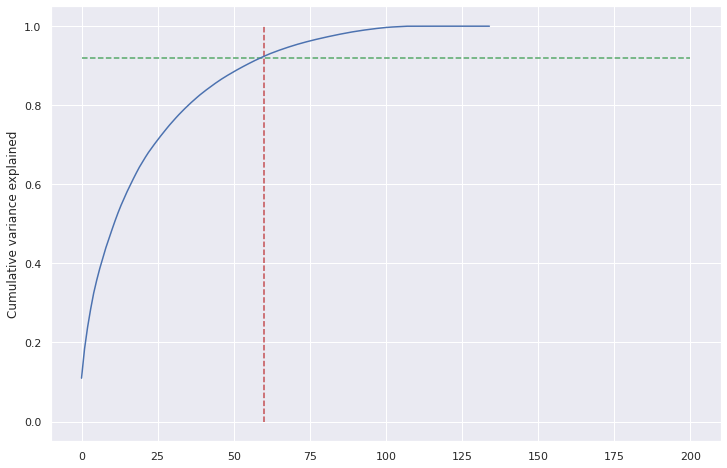

In [791]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.92, xmax=200, xmin=0, colors="g", linestyles="--")
plt.plot(cum_variance)
plt.ylabel("Cumulative variance explained")
plt.show()

PCA with 60 components(90% variance)

In [792]:
PCA_final=IncrementalPCA(n_components=60)

In [793]:
df_train_PCA=PCA_final.fit_transform(X_train)

In [794]:
df_train_PCA.shape

(8363, 60)

In [795]:
df_test_PCA=PCA_final.transform(X_test)

In [796]:
pca_df = pd.DataFrame(df_train_PCA)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-1.626976,-2.640779,-1.196118,-0.592014,0.082119,0.919641,0.451267,-0.398347,2.103043,0.818156,-0.416118,-0.095920,0.904432,-0.635175,0.437946,-0.141756,-0.870904,0.078963,0.202228,0.123668,0.046929,0.125677,0.342645,-0.164808,-0.170064,0.452712,0.273207,-0.338359,-0.343759,0.067964,-0.152359,-0.493738,0.299124,0.429304,-0.337043,0.236096,0.120320,-0.055679,0.423412,-0.249033,-0.195220,-0.419151,-0.273597,-0.197497,0.251305,-0.012621,0.334137,-0.047930,-0.273083,-0.092964,-0.418772,-0.459181,-0.438150,0.274140,-0.054471,-0.501180,0.097873,0.011937,-0.120773,-0.162017
1,-1.667637,0.642871,-3.217326,0.375724,-2.026181,-0.001063,0.059388,-0.524957,1.587649,1.320751,-0.360963,-0.524214,-0.228369,-1.618123,-0.075239,0.993400,2.226346,-1.169888,-1.602603,-1.426716,0.672181,-0.774242,-0.882975,-0.683308,0.082512,0.771391,0.674564,1.337641,-0.082982,0.819628,-0.918681,0.004510,-1.105613,0.342068,-0.355312,2.654300,-0.281906,0.071361,-0.417227,0.477927,0.263474,-0.559781,-0.358986,-0.242431,-0.042523,-0.789991,0.547534,-0.538090,-0.639905,-0.239908,0.533659,0.108377,0.446131,-0.254078,0.393822,0.380616,-0.529110,-0.311817,0.058461,-0.162157
2,-4.592851,4.445504,-0.907443,2.307423,-2.206192,0.243429,0.747325,-1.974952,-0.022438,1.643093,2.631741,-2.827851,1.522486,-2.089382,-0.939814,-0.170968,0.064464,0.936919,-0.875169,-0.705849,0.227022,-0.098696,-0.777445,-1.140267,-0.869972,-0.914523,-1.698194,-0.802483,-0.218735,1.898368,1.775631,-0.651674,2.581860,-1.669211,-0.658770,1.085648,-0.608792,1.526356,1.085241,0.558775,1.004658,0.124128,0.235952,1.128731,0.159917,0.550658,0.305007,-0.509680,0.035322,0.686850,1.032136,-0.139865,0.020285,-0.207312,0.925439,-0.938849,0.088433,0.100699,0.413133,0.378126
3,0.654115,-1.885042,-0.356863,-1.529268,0.801159,-1.142123,0.301024,0.388328,1.669112,-1.045209,0.435443,0.336581,-0.486770,-1.175703,0.901192,-0.762520,-0.486259,-0.283310,-0.131033,0.346749,0.110063,-0.075414,-0.187779,-0.632681,-0.398064,-1.235903,0.230732,1.614919,0.629117,0.025112,-0.148875,-0.305340,-1.296562,-0.707425,0.550084,-0.068196,0.881953,0.252842,-0.504204,-1.244219,0.171821,0.857023,0.079566,-0.688386,-0.878721,-0.465589,0.430904,-0.021314,-0.690079,0.240936,0.230866,-0.264256,0.047739,-0.738621,0.191674,0.053861,-0.098788,0.573983,-0.296319,-0.401688
4,-7.251074,0.696525,4.642504,-2.706186,0.840427,-0.628213,-2.131943,3.572198,-0.163477,0.624584,-0.642794,0.554913,-0.716367,1.575249,1.486240,-0.480268,-0.174864,-0.334506,-1.240283,0.781269,1.534411,-0.528825,-2.335683,-1.704419,0.837270,-1.204159,-1.332402,-1.197547,-0.056939,-0.362751,-0.679908,-1.219493,-0.449784,0.755291,0.975668,-0.765581,-0.430847,-0.075407,-0.289913,-0.027734,-0.125792,-0.197677,0.041322,-0.304696,-0.508567,-0.042770,-0.393532,-0.379004,-0.121634,-0.123275,-0.461418,-0.228668,-0.121822,0.179606,0.083745,0.027527,0.371924,-0.254184,0.221843,0.072075


In [797]:
y_train_df = pd.DataFrame(y_train)
y_train_df['churn'].value_counts()

0    6433
1    1930
Name: churn, dtype: int64

In [798]:
final_pca_df = pd.concat([pca_df,y_train_df],axis=1)

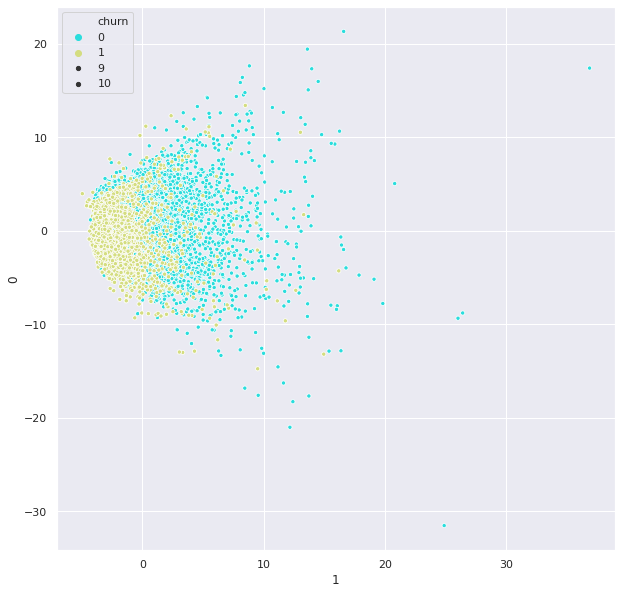

In [799]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=final_pca_df[1],y=final_pca_df[0],hue=final_pca_df['churn'],size=10,palette='rainbow')

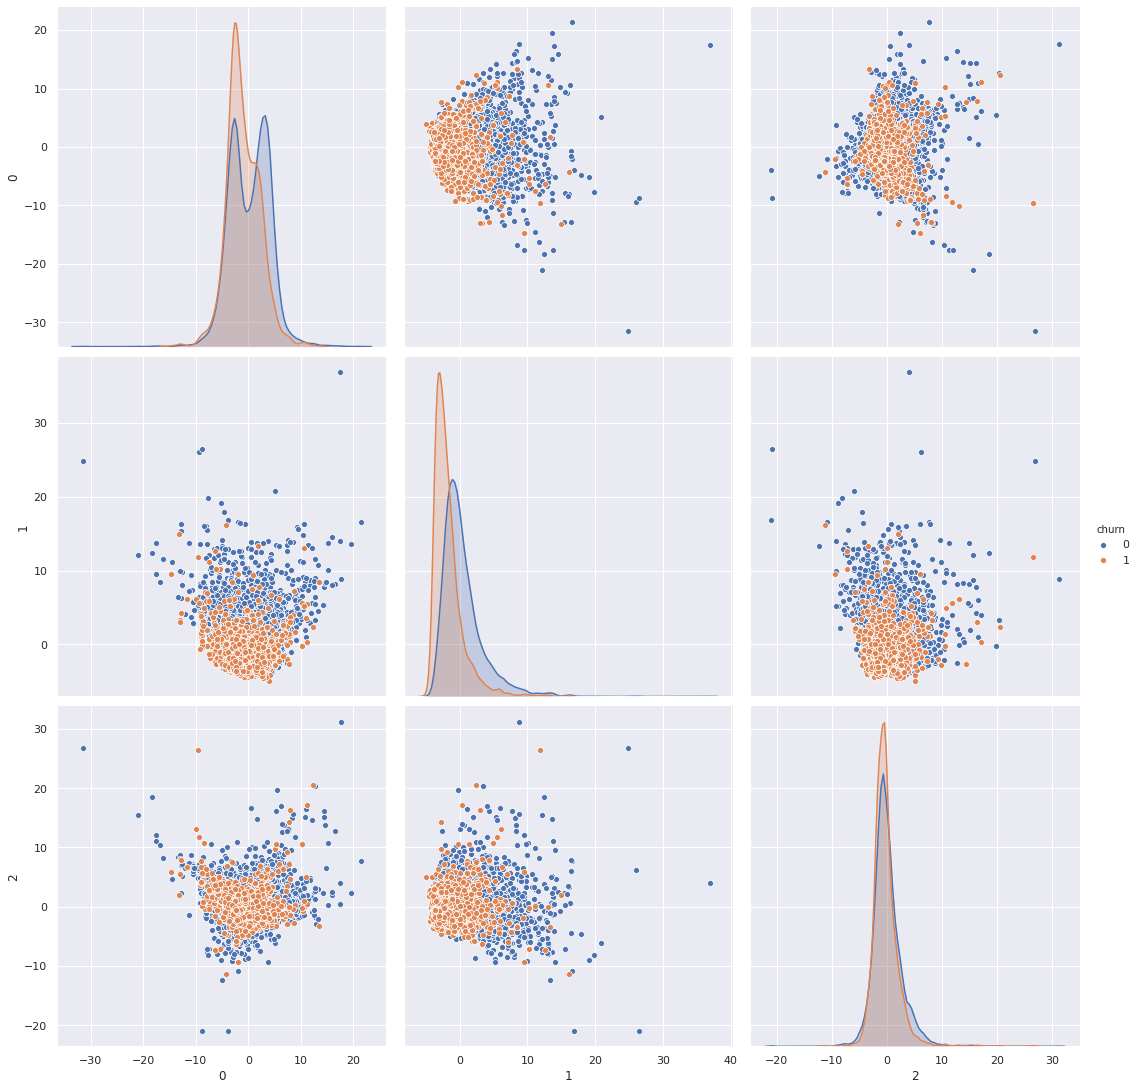

In [800]:
sns.pairplot(data=final_pca_df, x_vars=[0,1,2], y_vars=[0,1,2], hue = "churn", size=5)


In [801]:
PCA_final.explained_variance_ratio_[0:4]

array([0.10963257, 0.07452008, 0.05462452, 0.04554165])

#### We can clearly see that fisrt 4 pca components are capturing certain amount of variance 

## Model Building - With PCA


In [802]:
def model_evaluation_metrics(results,modelname,actual,predicted):
    cm1 = metrics.confusion_matrix(actual,predicted)
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    tempResults = pd.DataFrame({'Method':modelname,
                                'Accuracy':[metrics.accuracy_score(actual,predicted)],
                                'Specificity':speci,
                                'Sensitivity':sensi,
                                'Precision': [metrics.precision_score(actual,predicted)], 
                                'Recall': [metrics.recall_score(actual,predicted)]})
    results = pd.concat([results, tempResults])
    return results

    

### Logistic Regression

In [803]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score 

In [804]:
C = [10, 1, .1, .001]

for c in C:
    logreg_pca_m1=LogisticRegression(class_weight='balanced',penalty='l1',C=c,solver='liblinear')
    logreg_pca_m1_fit=logreg_pca_m1.fit(df_train_PCA,y_train)
    pred_logreg_pca_test=logreg_pca_m1_fit.predict(df_test_PCA)
    cm1 = metrics.confusion_matrix(y_test,pred_logreg_pca_test)
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print("----C = {}".format(c))
    print("Precision: {}".format(metrics.precision_score(y_test,pred_logreg_pca_test)))
    print("Recall: {}".format(metrics.recall_score(y_test,pred_logreg_pca_test)))
    print("Accuracy: {}".format( metrics.accuracy_score(y_test,pred_logreg_pca_test)))
    print("Specifity: {}".format(sensi))

----C = 10
Precision: 0.28374384236453204
Recall: 0.8011126564673157
Accuracy: 0.8223779334890446
Specifity: 0.8011126564673157
----C = 1
Precision: 0.28437654016757025
Recall: 0.8025034770514604
Accuracy: 0.8227116004893783
Specifity: 0.8025034770514604
----C = 0.1
Precision: 0.28213935230618253
Recall: 0.799721835883171
Accuracy: 0.821265710154599
Specifity: 0.799721835883171
----C = 0.001
Precision: 0.15849843587069865
Recall: 0.8456189151599444
Accuracy: 0.6286286286286287
Specifity: 0.8456189151599444


In [805]:
logreg_pca_m1=LogisticRegression(class_weight='balanced',penalty='l1',C=0.001,solver='liblinear')
logreg_pca_m1_fit=logreg_pca_m1.fit(df_train_PCA,y_train)
pred_logreg_pca_test=logreg_pca_m1_fit.predict(df_test_PCA)
results=pd.DataFrame()
results=model_evaluation_metrics(results,'Logistic Regression',y_test,pred_logreg_pca_test)
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall
0,Logistic Regression,0.628629,0.609768,0.845619,0.158498,0.845619


### SVM

### Linear Kernel

In [806]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold

In [807]:
# # linear model
model_linear = SVC(kernel='linear')
model_linear.fit(df_train_PCA, y_train)

# predict
y_train_pred = model_linear.predict(df_train_PCA)
y_test_pred = model_linear.predict(df_test_PCA)

In [808]:

train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
print("Accuracy on training data: {}".format(train_accuracy))
test_accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Accuracy on testing data: {}".format(test_accuracy))

print("\nClassification report on testing set \n")
print(metrics.classification_report(y_test, y_test_pred))

print("\nConfusion metrics on testing set \n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred))
print("Precision: {}".format(metrics.precision_score(y_test,y_test_pred)))
print("Recall: {}".format(metrics.recall_score(y_test,y_test_pred))) 

Accuracy on training data: 0.8754035633146
Accuracy on testing data: 0.9053497942386831

Classification report on testing set 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8272
           1       0.44      0.65      0.52       719

    accuracy                           0.91      8991
   macro avg       0.70      0.79      0.74      8991
weighted avg       0.93      0.91      0.91      8991


Confusion metrics on testing set 

[[7674  598]
 [ 253  466]]
Precision: 0.43796992481203006
Recall: 0.6481223922114048


In [809]:

results=model_evaluation_metrics(results,'SVM - Linear',y_test,y_test_pred)
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall
0,Logistic Regression,0.628629,0.609768,0.845619,0.158498,0.845619
0,SVM - Linear,0.905350,0.927708,0.648122,0.437970,0.648122


### Non Linear Poly kernel

In [810]:
 # non-linear model
 # using poly kernel, C=1, default value of gamma

 # model
 non_linear_model_poly = SVC(kernel='poly')
 non_linear_model_poly.fit(df_train_PCA, y_train)

 # predict
 y_train_pred = non_linear_model_poly.predict(df_train_PCA)
 y_test_pred = non_linear_model_poly.predict(df_test_PCA)

In [811]:
 train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
 print("Accuracy on training data: {}".format(train_accuracy))
 test_accuracy = metrics.accuracy_score(y_test,y_test_pred)
 print("Accuracy on testing data: {}".format(test_accuracy))

 print("\nClassification report on testing set \n")
 print(metrics.classification_report(y_test, y_test_pred))
 print("\nConfusion metrics on testing set \n")
 print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred))

Accuracy on training data: 0.867272509864881
Accuracy on testing data: 0.9179179179179179

Classification report on testing set 

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8272
           1       0.48      0.41      0.45       719

    accuracy                           0.92      8991
   macro avg       0.72      0.69      0.70      8991
weighted avg       0.91      0.92      0.91      8991


Confusion metrics on testing set 

[[7955  317]
 [ 421  298]]


In [812]:
print("Precision: {}".format(metrics.precision_score(y_test,y_test_pred)))
print("Recall: {}".format(metrics.recall_score(y_test,y_test_pred)))

Precision: 0.4845528455284553
Recall: 0.4144645340751043


In [813]:

results=model_evaluation_metrics(results,'SVM - Poly',y_test,y_test_pred)
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall
0,Logistic Regression,0.628629,0.609768,0.845619,0.158498,0.845619
0,SVM - Linear,0.905350,0.927708,0.648122,0.437970,0.648122
0,SVM - Poly,0.917918,0.961678,0.414465,0.484553,0.414465


### rbf kernel

In [814]:

# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model_poly = SVC(kernel='rbf')
non_linear_model_poly.fit(df_train_PCA, y_train)

# predict
y_train_pred = non_linear_model_poly.predict(df_train_PCA)
y_test_pred = non_linear_model_poly.predict(df_test_PCA)

In [815]:
train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
print("Accuracy on training data: {}".format(train_accuracy))
test_accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Accuracy on testing data: {}".format(test_accuracy))

print("\nClassification report on testing set \n")
print(metrics.classification_report(y_test, y_test_pred))
print("\nConfusion metrics on testing set \n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred))
print("Precision: {}".format(metrics.precision_score(y_test,y_test_pred)))
print("Recall: {}".format(metrics.recall_score(y_test,y_test_pred)))

Accuracy on training data: 0.9019490613416238
Accuracy on testing data: 0.9148036925814703

Classification report on testing set 

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      8272
           1       0.47      0.61      0.53       719

    accuracy                           0.91      8991
   macro avg       0.72      0.78      0.74      8991
weighted avg       0.93      0.91      0.92      8991


Confusion metrics on testing set 

[[7786  486]
 [ 280  439]]
Precision: 0.4745945945945946
Recall: 0.6105702364394993


In [816]:

results=model_evaluation_metrics(results,'SVM - rbf',y_test,y_test_pred)
results


,Method,Accuracy,Specificity,Sensitivity,Precision,Recall
0,Logistic Regression,0.628629,0.609768,0.845619,0.158498,0.845619
0,SVM - Linear,0.905350,0.927708,0.648122,0.437970,0.648122
0,SVM - Poly,0.917918,0.961678,0.414465,0.484553,0.414465
0,SVM - rbf,0.914804,0.941248,0.610570,0.474595,0.610570


- out of linear, poly, rbf rbg gave the best result. Lets proceed with hyper parameter tuning of rbf kernel


#### Hyperparameter tuning of SVM

In [820]:
from sklearn.model_selection import StratifiedKFold
#pipe_steps = [('scaler',StandardScaler()),('pca',PCA()),('SVM',SVC(kernel='poly'))]
pipe_steps = [('SVM',SVC(kernel='rbf',class_weight='balanced'))]
check_params = {
    'SVM__C':[1,10],
    'SVM__gamma':[0.01,0.001]
}

pipeline = Pipeline(pipe_steps)

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
 #setting up GridSearchCV()
model_cv = GridSearchCV(estimator = pipeline,
                       param_grid = check_params,
                       scoring = 'recall',
                       cv = folds,
                       verbose = 3,
                       return_train_score=True,
                       n_jobs=-1)

#fit the model
model_cv.fit(df_train_PCA,y_train) # Considering our initial data as scaling will be handled by the pipeline.
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:   18.7s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   18.8s finished


The best test score is 0.829531440678239 corresponding to hyperparameters {'SVM__C': 10, 'SVM__gamma': 0.001}


In [821]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_SVM__C', 'param_SVM__gamma', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

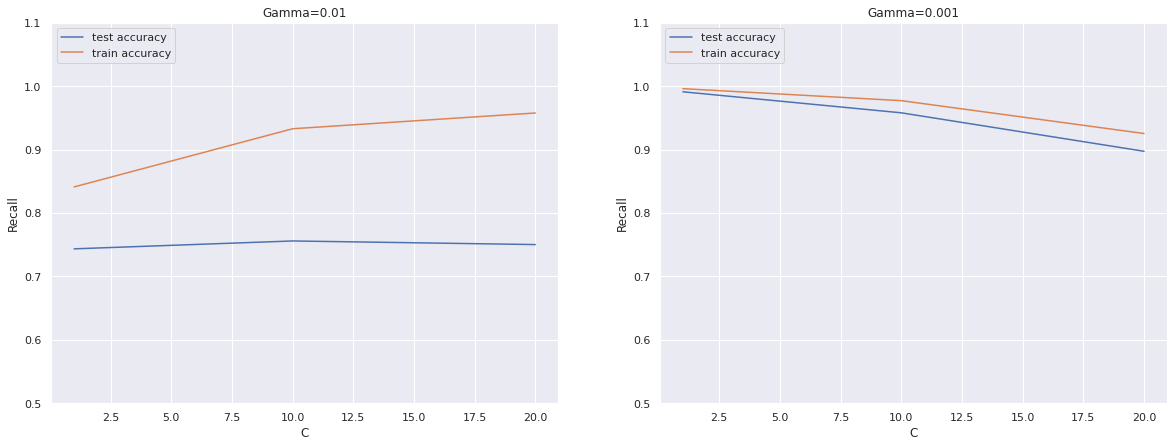

In [633]:
 # converting C to numeric type for plotting on x-axis
cv_results['param_SVM__C'] = cv_results['param_SVM__C'].astype('int')

# # plotting
plt.figure(figsize=(20,7))

# subplot 1/2
plt.subplot(121)
gamma_01 = cv_results[(cv_results['param_SVM__gamma']==0.01)]

plt.plot(gamma_01["param_SVM__C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_SVM__C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')


# subplot 2/2
plt.subplot(122)
gamma_001 = cv_results[(cv_results['param_SVM__gamma']==0.001)]

plt.plot(gamma_001["param_SVM__C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_SVM__C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')

### Final SVM model

In [822]:
# model
final_model = model_cv.best_estimator_
#SVC(C=1, gamma=0.01, kernel="rbf")

final_model.fit(df_train_PCA, y_train)
# predict
y_train_pred = final_model.predict(df_train_PCA)
y_test_pred = final_model.predict(df_test_PCA)

In [823]:
train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
print("Accuracy on training data: {}".format(train_accuracy))
test_accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Accuracy on testing data: {}".format(test_accuracy))

print("\nClassification report on testing set \n")
print(metrics.classification_report(y_test, y_test_pred))
print("\nConfusion metrics on testing set \n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred))
print("Precision: {}".format(metrics.precision_score(y_test,y_test_pred)))
print("Recall: {}".format(metrics.recall_score(y_test,y_test_pred)))

Accuracy on training data: 0.8666746382876958
Accuracy on testing data: 0.8525191858525192

Classification report on testing set 

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8272
           1       0.32      0.78      0.46       719

    accuracy                           0.85      8991
   macro avg       0.65      0.82      0.69      8991
weighted avg       0.93      0.85      0.88      8991


Confusion metrics on testing set 

[[7104 1168]
 [ 158  561]]
Precision: 0.324465008675535
Recall: 0.780250347705146


In [824]:
results=model_evaluation_metrics(results,'SVM - Tuned',y_test,y_test_pred)
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall
0,Logistic Regression,0.628629,0.609768,0.845619,0.158498,0.845619
0,SVM - Linear,0.905350,0.927708,0.648122,0.437970,0.648122
0,SVM - Poly,0.917918,0.961678,0.414465,0.484553,0.414465
0,SVM - rbf,0.914804,0.941248,0.610570,0.474595,0.610570
0,SVM - Tuned,0.852519,0.858801,0.780250,0.324465,0.780250


### Random Forest

In [825]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0,class_weight="balanced")
rf_model.fit(df_train_PCA,y_train)

y_pred_train = rf_model.predict(df_train_PCA)
y_pred_test = rf_model.predict(df_test_PCA)

train_accuracy = metrics.accuracy_score(y_train,y_pred_train)
print("Accuracy on training data: {}".format(train_accuracy))
test_accuracy = metrics.accuracy_score(y_test,y_pred_test)
print("Accuracy on testing data: {}".format(test_accuracy))

print("\nClassification report on testing set \n")
print(metrics.classification_report(y_test, y_pred_test))

print("\nConfusion metrics on testing set \n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_test))
print("Precision: {}".format(metrics.precision_score(y_test,y_pred_test)))
print("Recall: {}".format(metrics.recall_score(y_test,y_pred_test)))

Accuracy on training data: 1.0
Accuracy on testing data: 0.9168056945834724

Classification report on testing set 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      8272
           1       0.48      0.43      0.45       719

    accuracy                           0.92      8991
   macro avg       0.71      0.69      0.70      8991
weighted avg       0.91      0.92      0.91      8991


Confusion metrics on testing set 

[[7937  335]
 [ 413  306]]
Precision: 0.47737909516380655
Recall: 0.42559109874826145


In [826]:
results=model_evaluation_metrics(results,'Random Forest - Default',y_test,y_pred_test)
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall
0,Logistic Regression,0.628629,0.609768,0.845619,0.158498,0.845619
0,SVM - Linear,0.905350,0.927708,0.648122,0.437970,0.648122
0,SVM - Poly,0.917918,0.961678,0.414465,0.484553,0.414465
0,SVM - rbf,0.914804,0.941248,0.610570,0.474595,0.610570
0,SVM - Tuned,0.852519,0.858801,0.780250,0.324465,0.780250
0,Random Forest - Default,0.916806,0.959502,0.425591,0.477379,0.425591


### Tuning max_feature

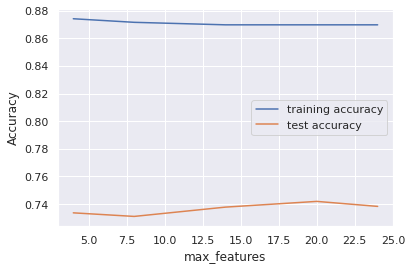

In [827]:
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=7,class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                  return_train_score=True)
rf.fit(df_train_PCA, y_train)
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning Max_depth

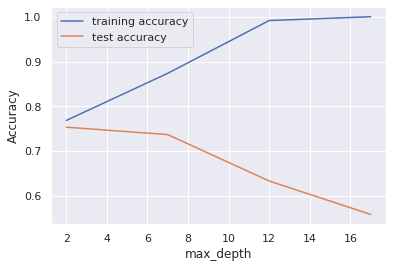

In [828]:

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
rf.fit(df_train_PCA, y_train)
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

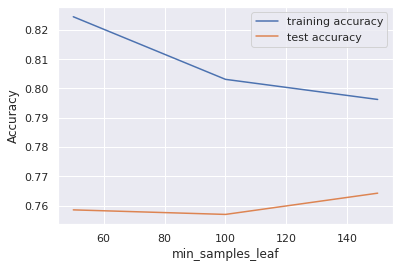

In [829]:

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 200, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                  return_train_score=True)
rf.fit(df_train_PCA, y_train)
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split


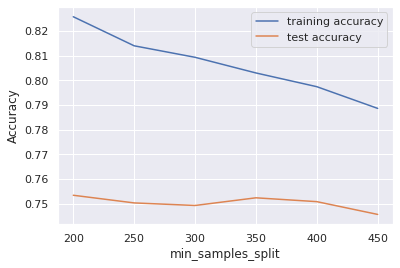

In [830]:
# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                  return_train_score=True)
rf.fit(df_train_PCA, y_train)
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

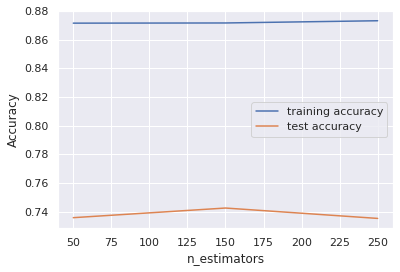

In [831]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

n_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


# parameters to build the model on
parameters = {'n_estimators': range(50, 300, 100)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=7,class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                  return_train_score=True)
rf.fit(df_train_PCA, y_train)

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [832]:
#hyper parameter tuning
# Create the parameter grid based on the results of random search 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
param_grid = {
    'max_depth': [7,10],
    'min_samples_leaf': [100,110],
    'min_samples_split': [250, 350],
    'n_estimators': [150], 
    'max_features': [int(round(np.sqrt(df_train_PCA.shape[1]))),14]
}
# Create a based model
rf = RandomForestClassifier(random_state=0, class_weight="balanced")

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf , param_grid = param_grid, 
                          cv = folds, n_jobs = -1,verbose = 1,
                          scoring = 'recall',
                          return_train_score = True)
grid_search.fit(df_train_PCA, y_train)
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.1min finished


We can get recall of 0.7626984663633524 using {'max_depth': 10, 'max_features': 14, 'min_samples_leaf': 100, 'min_samples_split': 250, 'n_estimators': 150}


In [833]:
 cv_results_rf = pd.DataFrame(grid_search.cv_results_)
 cv_results_rf.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_leaf',
       'param_min_samples_split', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

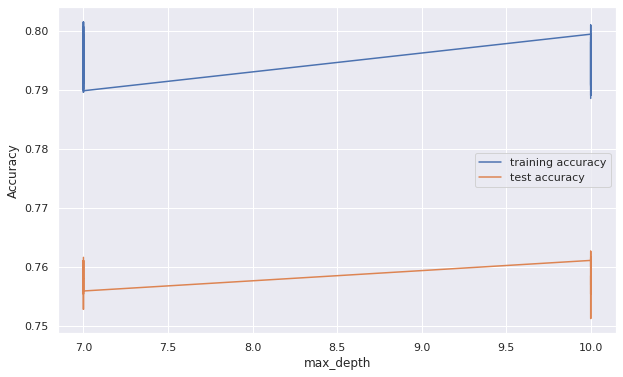

In [834]:
plt.figure(figsize=(10,6))
plt.plot(cv_results_rf["param_max_depth"], 
         cv_results_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_rf["param_max_depth"], 
         cv_results_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()

In [835]:
#using best parameters after tuning
rf_model = grid_search.best_estimator_
#RandomForestClassifier(class_weight='balanced',
#                                  max_depth = 15,
#                                  max_features = 9, 
#                                  min_samples_leaf = 30,
#                                  min_samples_split = 10,
#                                  n_estimators = 50
#                                 )
rf_model.fit(df_train_PCA,y_train)
y_test_pred = rf_model.predict(df_test_PCA)
print("Accuracy: {}".format(metrics.accuracy_score(y_test,y_test_pred)))
print("Recall: {}".format(metrics.recall_score(y_test,y_test_pred)))
print("Precsion: {}".format(metrics.precision_score(y_test,y_test_pred)))

Accuracy: 0.8526304081859637
Recall: 0.7079276773296245
Precsion: 0.31342364532019706


In [836]:
results=model_evaluation_metrics(results,'Random Forest - Tuned',y_test,y_test_pred)
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall
0,Logistic Regression,0.628629,0.609768,0.845619,0.158498,0.845619
0,SVM - Linear,0.905350,0.927708,0.648122,0.437970,0.648122
0,SVM - Poly,0.917918,0.961678,0.414465,0.484553,0.414465
0,SVM - rbf,0.914804,0.941248,0.610570,0.474595,0.610570
0,SVM - Tuned,0.852519,0.858801,0.780250,0.324465,0.780250
0,Random Forest - Default,0.916806,0.959502,0.425591,0.477379,0.425591
0,Random Forest - Tuned,0.852630,0.865208,0.707928,0.313424,0.707928


## Model Building - feature importance

### RFE for logistic regression

In [837]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

X = telecom_data.drop(['churn'],axis=1)
y = telecom_data.churn
telecom_columns = X.columns


over = SMOTE(sampling_strategy=0.1,random_state=100)
#over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5,random_state=100)

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,stratify=y,random_state=100)
train_cols=X_train.columns
X_train_smote, y_train = over.fit_resample(X_train, y_train)
X_train_under, y_train = under.fit_resample(X_train_smote, y_train)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_under[train_cols])
X_test[train_cols]=scaler.transform(X_test[train_cols])

In [838]:
columns_train=list(telecom_data.columns)
columns_train=columns_train.remove('churn')
X_train=pd.DataFrame(X_train,index=[i for i in range(0,len(X_train))],columns=list(train_cols))
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,last_date_of_month_6_day,last_date_of_month_7_day,last_date_of_month_8_day,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day,date_of_last_rech_data_6_day,date_of_last_rech_data_7_day,date_of_last_rech_data_8_day,total_rech_amt_diff,vol_3g_mb_diff,vol_2g_mb_diff,total_og_mou_diff,night_pck_user_6_1.0,night_pck_user_7_1.0,night_pck_user_8_1.0,fb_user_6_1.0,fb_user_7_1.0,fb_user_8_1.0,custRelation_1,custRelation_2,custRelation_3
0,0.0,0.0,0.0,-0.158083,-0.433245,0.033754,-0.390710,-0.393441,-0.328603,-0.248786,-0.271779,-0.030392,0.335496,0.074890,1.868727,1.011017,0.169668,-0.199997,-0.222904,-0.141658,-0.516430,-0.289276,0.122913,-0.243209,-0.294922,-0.246415,0.229840,-0.242399,-0.145913,-0.149326,-0.133615,-0.123958,0.0,0.0,0.0,-0.575425,-0.482125,-0.290060,-0.251269,-0.235841,-0.017834,-0.761401,-0.603661,-0.249088,-0.226065,-0.291110,-0.177568,-0.373001,-0.267675,-0.318648,-0.266468,-0.189450,-0.198000,0.175003,-0.316465,-0.160177,-0.165784,-0.135787,-0.13155,-0.092912,0.0,0.0,0.0,-0.348318,-0.244056,-0.072072,-0.626219,-0.498367,-0.188043,-0.409964,-0.151832,-0.177037,-0.116618,-0.141890,-0.175821,-0.074670,-0.114267,-0.056848,0.303320,-0.451778,-0.150212,-0.467789,-0.580094,-0.080534,-0.360171,-0.288902,-0.100990,-0.552323,-0.533202,-0.463051,-0.695787,-0.666786,-0.600832,-0.444864,-0.446427,-0.360336,-0.660298,-0.635961,-0.565346,-0.368717,-0.364268,-0.42435,-0.423613,-0.356998,-0.367574,-0.349033,-0.326934,-0.201741,-0.186733,-0.15784,-0.382557,-0.156210,-0.383730,0.0,0.0,0.0,0.752259,-0.102909,-0.068136,-0.892739,-0.889468,-0.753372,0.404966,0.093162,0.145572,0.588858,-0.111422,-0.096116,-0.088504,-0.967037,-0.955067,-0.792612,-0.571367,-0.309452,-0.4638
1,0.0,0.0,0.0,0.218902,-0.112466,1.012901,-0.463228,-0.460828,-0.446034,-0.189996,-0.252673,0.308654,-0.217701,-0.177216,-0.243711,-0.243963,-0.204836,-0.084208,-0.126228,-0.254908,-0.103601,-0.205623,0.010380,-0.243209,-0.294922,-0.246415,-0.189477,-0.242399,-0.316236,-0.149326,-0.133615,-0.123958,0.0,0.0,0.0,-0.599841,-0.561734,-0.445332,-0.233746,-0.281318,-0.377339,-0.392990,-0.437829,-0.011321,2.661843,1.228062,3.329411,0.749567,-0.284056,-0.318648,-0.290079,-0.204575,-0.207715,-0.226902,-0.267424,-0.256464,-0.008654,-0.135787,-0.13155,-0.120780,0.0,0.0,0.0,-0.325539,-0.321950,-0.120575,

In [839]:
train_cols=[col for col in train_cols if col not in corr_cols]
train_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou

In [840]:
len(train_cols)

135

In [841]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg_rfe= LogisticRegression(max_iter=200)
rfe=RFE(logreg_rfe,20) 


As actionable decisions can be made using minimal set of variables ,using 20 as the ideal number of features in Recursive Feature Elimination,to derive insights using the top 20 variables

In [842]:
X_train.shape

(5790, 135)

In [843]:
y_train.shape

(5790,)

In [844]:
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(max_iter=200), n_features_to_select=20)

In [845]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('loc_og_t2o_mou', False, 116),
 ('std_og_t2o_mou', False, 115),
 ('loc_ic_t2o_mou', False, 114),
 ('arpu_6', False, 22),
 ('arpu_7', False, 52),
 ('arpu_8', False, 51),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 2),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 32),
 ('roam_ic_mou_8', False, 53),
 ('roam_og_mou_6', False, 21),
 ('roam_og_mou_7', False, 35),
 ('roam_og_mou_8', False, 4),
 ('loc_og_t2t_mou_6', False, 81),
 ('loc_og_t2t_mou_7', False, 83),
 ('loc_og_t2t_mou_8', False, 3),
 ('loc_og_t2m_mou_6', False, 31),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', False, 28),
 ('loc_og_t2f_mou_7', False, 104),
 ('loc_og_t2f_mou_8', False, 61),
 ('loc_og_t2c_mou_6', False, 71),
 ('loc_og_t2c_mou_7', False, 60),
 ('loc_og_t2c_mou_8', False, 91),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 85),
 ('std_og_t2f_mou_7', False, 86),
 ('std_og_t2f_mou_8', False, 12),
 ('

Filtering data with the features selected by RFE

In [846]:
cols=X_train.columns[rfe.support_]
cols

Index(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_7',
       'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_7', 'std_ic_mou_8', 'total_ic_mou_8', 'isd_ic_mou_8',
       'last_day_rch_amt_8', 'date_of_last_rech_8_day', 'total_og_mou_diff',
       'fb_user_8_1.0'],
      dtype='object')

In [847]:
X_train_rfe=X_train[cols]
X_train_rfe.head()

,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_7,std_og_mou_8,total_og_mou_6,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_7,std_ic_mou_8,total_ic_mou_8,isd_ic_mou_8,last_day_rch_amt_8,date_of_last_rech_8_day,total_og_mou_diff,fb_user_8_1.0
0,-0.390710,-0.393441,-0.248786,-0.271779,-0.030392,-0.289276,-0.145913,-0.482125,-0.290060,-0.761401,-0.249088,-0.177568,-0.373001,-0.072072,-0.188043,-0.175821,-0.100990,-0.068136,0.588858,-0.792612
1,-0.463228,-0.460828,-0.189996,-0.252673,0.308654,-0.205623,-0.316236,-0.561734,-0.445332,-0.392990,-0.011321,3.329411,0.749567,-0.120575,1.447671,-0.164806,-0.479566,0.776070,0.521049,-0.792612
2,-0.152164,-0.348040,0.257999,1.143704,0.887895,2.297502,0.147621,-0.058187,-0.106772,0.075045,0.623871,1.827134,3.055649,0.612571,3.737156,-0.157779,0.391159,0.438387,0.109090,-0.792612
3,0.678565,0.054444,-0.496022,-0.397909,-0.423290,-0.593638,-0.336169,-0.504830,-0.253634,0.133009,-0.408254,-0.322765,-0.615847,-0.316200,-0.498641,-0.077446,0.270014,0.100705,-0.070959,-0.792612
4,3.685700,3.788442,-0.131369,-0.496908,-0.297992,-0.546763,-0.044203,2.630461,3.418546,2.362661,2.711344,-0.273689,-0.416886,-0.090420,-0.292909,-0.175821,0.391159,0.438387,0.252489,-0.792612


### Function to deduce the best model

In [848]:
def deduce_best_model(y_train,X_train_rfe,drop_column=''):
    
    #X_train_rfe_trials=X_train_rfe
    if drop_column!='':
        X_train_rfe=X_train_rfe.drop(drop_column,axis=1)
    lm=sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial()).fit()
    print(lm.summary())
    
    X_train_new=X_train_rfe.drop(['const'],axis=1)
#X_train_new
    print()
    print()
    
    print("-------------------------VIF Results-------------------------")
    vif=pd.DataFrame()
    temp=X_train_new
    vif['Columns']=temp.columns
    vif['VIF']=[variance_inflation_factor(temp.values,i) for i in range(temp.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    print(vif)
    return X_train_rfe,lm

In [849]:
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe,lm1=deduce_best_model(y_train,X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 5790
Model:                            GLM   Df Residuals:                     5769
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2165.5
Date:                Mon, 06 Jul 2020   Deviance:                       4331.0
Time:                        18:00:32   Pearson chi2:                 2.73e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [850]:
## dropping high VIF variable - total_og_mou_8

X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe,lm1=deduce_best_model(y_train,X_train_rfe,'total_og_mou_8')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 5790
Model:                            GLM   Df Residuals:                     5770
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2171.4
Date:                Mon, 06 Jul 2020   Deviance:                       4342.7
Time:                        18:00:33   Pearson chi2:                 2.97e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [851]:
## dropping high P-value variable - onnet_mou_7

X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe,lm1=deduce_best_model(y_train,X_train_rfe,'onnet_mou_7')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 5790
Model:                            GLM   Df Residuals:                     5771
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2171.7
Date:                Mon, 06 Jul 2020   Deviance:                       4343.3
Time:                        18:00:33   Pearson chi2:                 2.91e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [852]:
## dropping high VIF variable - total_og_mou_6

X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe,lm1=deduce_best_model(y_train,X_train_rfe,'total_og_mou_6')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 5790
Model:                            GLM   Df Residuals:                     5772
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2218.3
Date:                Mon, 06 Jul 2020   Deviance:                       4436.5
Time:                        18:00:33   Pearson chi2:                 4.35e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [853]:
## dropping high VIF variable - std_og_mou_8
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe,lm1=deduce_best_model(y_train,X_train_rfe,'std_og_mou_8')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 5790
Model:                            GLM   Df Residuals:                     5773
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2222.6
Date:                Mon, 06 Jul 2020   Deviance:                       4445.2
Time:                        18:00:33   Pearson chi2:                 4.50e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [854]:
## dropping high VIF variable - offnet_mou_6
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe,lm1=deduce_best_model(y_train,X_train_rfe,'offnet_mou_6')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 5790
Model:                            GLM   Df Residuals:                     5774
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2222.6
Date:                Mon, 06 Jul 2020   Deviance:                       4445.3
Time:                        18:00:33   Pearson chi2:                 4.49e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [855]:
## dropping high VIF variable - offnet_mou_8
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe,lm1=deduce_best_model(y_train,X_train_rfe,'offnet_mou_8')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 5790
Model:                            GLM   Df Residuals:                     5775
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2226.2
Date:                Mon, 06 Jul 2020   Deviance:                       4452.4
Time:                        18:00:33   Pearson chi2:                 4.01e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [856]:
## dropping high VIF variable - total_ic_mou_8
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe,lm1=deduce_best_model(y_train,X_train_rfe,'total_ic_mou_8')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 5790
Model:                            GLM   Df Residuals:                     5776
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2425.2
Date:                Mon, 06 Jul 2020   Deviance:                       4850.4
Time:                        18:00:33   Pearson chi2:                 5.60e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [857]:
## dropping high P-value variable - onnet_mou_6
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe,lm1=deduce_best_model(y_train,X_train_rfe,'onnet_mou_6')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 5790
Model:                            GLM   Df Residuals:                     5777
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2425.2
Date:                Mon, 06 Jul 2020   Deviance:                       4850.5
Time:                        18:00:33   Pearson chi2:                 5.54e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [858]:
## dropping high P-value variable - isd_ic_mou_8
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe,lm1=deduce_best_model(y_train,X_train_rfe,'isd_ic_mou_8')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 5790
Model:                            GLM   Df Residuals:                     5778
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2425.2
Date:                Mon, 06 Jul 2020   Deviance:                       4850.5
Time:                        18:00:33   Pearson chi2:                 5.57e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### **Model evaluation on the train data**

In [859]:
## Predicting on the train data
#X_test_sm=sm.add_constant(X_test[X_train_rfe.columns])
y_train_pred=lm1.predict(X_train_rfe).values.reshape(-1)
y_train_pred[:10]

array([0.41024277, 0.00509892, 0.00685942, 0.5782589 , 0.21780697,
       0.44379416, 0.17666203, 0.30722747, 0.07588761, 0.10170341])

In [860]:
y_train_pred_final = pd.DataFrame({'Actual_Converted':y_train.values,'predicted':y_train_pred})
y_train_pred_final['Number'] = y_train.index
y_train_pred_final.head()

,Actual_Converted,predicted,Number
0,0,0.410243,0
1,0,0.005099,1
2,0,0.006859,2
3,0,0.578259,3
4,0,0.217807,4


In [861]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['predicted'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_Converted,predicted,Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.410243,0,1,1,1,1,1,0,0,0,0,0
1,0,0.005099,1,1,0,0,0,0,0,0,0,0,0
2,0,0.006859,2,1,0,0,0,0,0,0,0,0,0
3,0,0.578259,3,1,1,1,1,1,1,0,0,0,0
4,0,0.217807,4,1,1,1,0,0,0,0,0,0,0


In [862]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Actual_Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.333333  1.000000  0.000000
0.1   0.1  0.594301  0.945078  0.418912
0.2   0.2  0.730225  0.878238  0.656218
0.3   0.3  0.795337  0.825907  0.780052
0.4   0.4  0.827634  0.786528  0.848187
0.5   0.5  0.848014  0.742487  0.900777
0.6   0.6  0.827979  0.607772  0.938083
0.7   0.7  0.782556  0.420207  0.963731
0.8   0.8  0.737133  0.255959  0.977720
0.9   0.9  0.697237  0.106218  0.992746


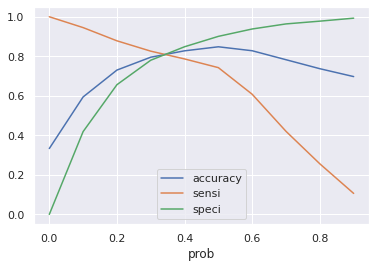

In [863]:
sns.set(font_scale=1)
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [864]:
y_train_pred_final['Predicted_Converted'] = y_train_pred_final['predicted'].map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final['Predicted_Converted'].value_counts()


0    3608
1    2182
Name: Predicted_Converted, dtype: int64

In [865]:
print(metrics.classification_report(y_train,y_train_pred_final['Predicted_Converted']))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      3860
           1       0.70      0.80      0.75      1930

    accuracy                           0.82      5790
   macro avg       0.80      0.81      0.80      5790
weighted avg       0.83      0.82      0.82      5790



### **Model evaluation on the test data**

In [866]:
X_train_rfe=X_train_rfe.drop('const',axis=1)

In [867]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


In [868]:
test_cols=[col for col in list(X_train_rfe.columns) if col!='const']
X_test_rfe=X_test[test_cols]
X_test_rfe=sm.add_constant(X_test_rfe)
y_test_pred=lm1.predict(X_test_rfe).values.reshape(-1)
y_test_pred[:10]

array([0.10454539, 0.14698122, 0.32330026, 0.13491743, 0.04011093,
       0.77860513, 0.03568785, 0.11842353, 0.08664826, 0.15638461])

In [869]:
y_test_pred_final = pd.DataFrame({'Actual_Converted':y_test.values,'predicted':y_test_pred})
y_test_pred_final['Number'] = y_test.index
y_test_pred_final.head()

,Actual_Converted,predicted,Number
0,0,0.104545,8679
1,1,0.146981,14408
2,0,0.323300,24340
3,0,0.134917,22332
4,0,0.040111,8312


In [870]:
y_test_pred_final['Predicted_Converted'] = y_test_pred_final['predicted'].map( lambda x: 1 if x > 0.37 else 0)
y_test_pred_final['Predicted_Converted'].value_counts()

0    7027
1    1964
Name: Predicted_Converted, dtype: int64

In [871]:
print(metrics.classification_report(y_test,y_test_pred_final['Predicted_Converted']))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8272
           1       0.28      0.76      0.41       719

    accuracy                           0.82      8991
   macro avg       0.63      0.80      0.65      8991
weighted avg       0.92      0.82      0.86      8991



In [872]:
cm1 = metrics.confusion_matrix(y_train_pred_final['Actual_Converted'], y_train_pred_final['Predicted_Converted'])
speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print(speci)
print(sensi)



0.8326424870466321
0.7958549222797927


In [873]:
cm1 = metrics.confusion_matrix(y_test_pred_final['Actual_Converted'], y_test_pred_final['Predicted_Converted'])
speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print(speci)
print(sensi)

0.8290618955512572
0.7649513212795549


In [874]:
results=model_evaluation_metrics(results,'Logistic Regression(using RFE)',y_test_pred_final['Actual_Converted'],y_test_pred_final['Predicted_Converted'])
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall
0,Logistic Regression,0.628629,0.609768,0.845619,0.158498,0.845619
0,SVM - Linear,0.905350,0.927708,0.648122,0.437970,0.648122
0,SVM - Poly,0.917918,0.961678,0.414465,0.484553,0.414465
0,SVM - rbf,0.914804,0.941248,0.610570,0.474595,0.610570
0,SVM - Tuned,0.852519,0.858801,0.780250,0.324465,0.780250
0,Random Forest - Default,0.916806,0.959502,0.425591,0.477379,0.425591
0,Random Forest - Tuned,0.852630,0.865208,0.707928,0.313424,0.707928
0,Logistic Regression(using RFE),0.823935,0.829062,0.764951,0.280041,0.764951


### **RandomForest Classification**

RandomForest classification with feature selection using SelectFromModel

In [875]:
###Instantiating a RandomForestClassifier
rfc=RandomForestClassifier(class_weight='balanced',random_state=100)


In [876]:
### Fitting the RFC using SelectFromModel
sfm=SelectFromModel(rfc)
sfm.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                 random_state=100))

In [877]:
### Extracting important features identified by SFM
X_train_sfm_cols=sfm.transform(X_train)
test_cols=[col for col in X_train.columns if col not in corr_cols ]
X_test_sfm_cols=sfm.transform(X_test[test_cols])

In [878]:
#### Rebuiding RFC model using important features
rfc_with_imp_feat=RandomForestClassifier(class_weight='balanced',
                                                  random_state=100)

In [879]:
rfc_with_imp_feat.fit(X_train_sfm_cols,y_train)

RandomForestClassifier(class_weight='balanced', random_state=100)

In [880]:
### Prediction on the train data
y_train_pred=rfc_with_imp_feat.predict(X_train_sfm_cols)


In [881]:
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3860
           1       1.00      1.00      1.00      1930

    accuracy                           1.00      5790
   macro avg       1.00      1.00      1.00      5790
weighted avg       1.00      1.00      1.00      5790



In [882]:
### Prediction on the test data
y_test_pred=rfc_with_imp_feat.predict(X_test_sfm_cols)


In [883]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      8272
           1       0.51      0.73      0.60       719

    accuracy                           0.92      8991
   macro avg       0.74      0.84      0.78      8991
weighted avg       0.94      0.92      0.93      8991



In [884]:
final_columns=[]
for feature_list_index in sfm.get_support(indices=True):
    final_columns.append(X_train.columns[feature_list_index])

In [885]:

#Cheking feature importance
final_pd=pd.concat([pd.DataFrame(X_train.columns,columns = ['features']),
           pd.DataFrame(rfc_with_imp_feat.feature_importances_,columns = ['importance'])],
          axis=1).sort_values(by='importance',ascending=False)

final_pd[~np.isnan(final_pd['importance'])]

,features,importance
15,roam_og_mou_7,0.124153
10,offnet_mou_7,0.078135
24,loc_og_t2f_mou_8,0.075766
1,std_og_t2o_mou,0.074285
4,arpu_7,0.057294
22,loc_og_t2m_mou_8,0.056356
3,arpu_6,0.049955
18,loc_og_t2t_mou_7,0.044532
25,loc_og_t2c_mou_6,0.044185
6,onnet_mou_6,0.036090


In [886]:
results=model_evaluation_metrics(results,'RandomForest(using SFM)',y_test,y_test_pred)


## Final Summary of Model Evaluation metrics on the Test data

In [887]:
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall
0,Logistic Regression,0.628629,0.609768,0.845619,0.158498,0.845619
0,SVM - Linear,0.905350,0.927708,0.648122,0.437970,0.648122
0,SVM - Poly,0.917918,0.961678,0.414465,0.484553,0.414465
0,SVM - rbf,0.914804,0.941248,0.610570,0.474595,0.610570
0,SVM - Tuned,0.852519,0.858801,0.780250,0.324465,0.780250
0,Random Forest - Default,0.916806,0.959502,0.425591,0.477379,0.425591
0,Random Forest - Tuned,0.852630,0.865208,0.707928,0.313424,0.707928
0,Logistic Regression(using RFE),0.823935,0.829062,0.764951,0.280041,0.764951
0,RandomForest(using SFM),0.922367,0.938709,0.734353,0.510145,0.734353


# Summary and Inferences

### Predictability - Summary

From the Test performance metrics of various classification models built using PCA applied data,"Logistic regression" can be chosen for predicting the churnability of the customer as Sensitivity/Recall on the test data is higher compared to other predictable models namely,SVM and Random Forest.

### Interpretability - Summary

From the Test performance metrics of the two interpretable models built - Logistic Regression(using RFE) and RandomForest(using SFM),"Logistic regression(using RFE)" can be chosen for interpreting the important features on which the target variable is dependant on as Sensitivity/Recall on the test data is higher compared to that of Random Forest model.

## Business Recommendations

After thorough analysis of the Data and results from the model,it can be observed that<br>

1.Customers calling outside network in the good phase have positive impact on the churn.<br>
2.On the other hand, customers with below usage behaviour have less chance of churning,<br>

1.Receiving calls in the good and action phase.<br>
2.Receiving STD calls in the action phase.<br>
3.Performing local and STD calls in the good and action phase.<br>
4.Recharging and the amount of recharge in the action phase.<br>
5.Opting for social networking(Facebook etc) in the action phase.<br>

From the above deductions,Company should monitor for the below Red flags of usage and may take following actions on probable churn customers<br>

#### **Probable red flags:**<br>
1.Customer has reduced or stopped using incoming services in the good or action phase.<br>
2.Customer has reduced or stopped using the outgoing and STD services in the good or action phase.<br>
3.The amount of recharge has reduced or completely gone down to zero in the action phase.<br>
4.Customer has not opted for special services like Social networking in the action phase.<br>
5.Customer has recorded good call activity outside network.<br>

#### **Precautionary measures:**<br>
1.Approach for feedback on services and provide incentives on providing feedback.<br>
2.Customer care executives can call the customers who are highly probable to churn and record the experience .<br>
3.Tweak the incoming and outgoing packages,social network tariffs often to attract or retain the customers.
